# **Abstarct**

Liver cirrhosis is a prevalent health concern, particularly in North America, attributable to elevated alcohol consumption. The objective of this project is to develop a predictive model for liver cirrhosis based on an individual's lifestyle and health conditions. The disease is categorized into four stages:

Stage 1: Normal

Stage 2: Fatty Liver

Stage 3: Liver Fibrosis

Stage 4: Liver Cirrhosis

The primary goal is to accurately predict the specific stage of liver cirrhosis based on a dataset comprising both numerical and categorical features related to an individual's lifestyle and health.

**Data Set:-**

The data set consists of :

N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Triglycerides,Platelets,Prothrombin -

The independent variables
Stage - The dependent variable
There are a total of 418 observations.

**Objective:-**

The objective of this assignment is to create a comprehensive and cohesive report that encapsulates the entire process of a data science project. This report should cover the critical stages of the project, including Data Cleaning, Feature Selection, Modeling, and Interpretability, presented in a clear and readable format. The goal is to provide a thorough understanding of the project's workflow and decisions.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from google.colab import files
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc={"figure.figsize": (16, 8)})
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import shap
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf  # OLS model Library

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.1 MB/s eta 0:00:00


In [11]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
# installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=8f658ca12a157536a58fea6b9701d71d2ade5245d64885dc01212a6b031aa42a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [35]:
# Download the file from GitHub
!wget https://raw.githubusercontent.com/Vinay1289Sai/DSMT1_Vinay/main/cirrhosis_github.csv -O cirrhosis_github.csv

# Load the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('cirrhosis_github.csv')

# Display the first few rows of the DataFrame
print(df.head())

--2024-04-03 01:50:23--  https://raw.githubusercontent.com/Vinay1289Sai/DSMT1_Vinay/main/cirrhosis_github.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30700 (30K) [text/plain]
Saving to: ‘cirrhosis_github.csv’

cirrhosis_github.cs 100%[===================>]  29.98K  --.-KB/s    in 0.002s  

2024-04-03 01:50:24 (12.3 MB/s) - ‘cirrhosis_github.csv’ saved [30700/30700]

   N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  21464   F       Y            Y       Y   
1    4500      C  D-penicillamine  20617   F       N            Y       Y   
2    1012      D  D-penicillamine  25594   M       N            N       N   
3    1925      D  D-penicillamine  19994   F       N            Y       Y   
4    1

In [36]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [37]:
#Data Types - both numerical and Categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical columns List-',numeric_columns)
print('categorical columns List-',categorical_columns)

numerical columns List- Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
categorical columns List- Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [ ]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [ ]:
df.shape

(418, 19)

In [ ]:
#Missing Values
missing_values = df.isnull().sum()
missing_values

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [38]:
#Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Create a DataFrame to show missing values
missing_data_info = pd.DataFrame({
    'Column': columns_with_missing,
    'Missing Values': df[columns_with_missing].isnull().sum(),
    'Percentage Missing': (df[columns_with_missing].isnull().sum() / len(df)) * 100
})

# Display the information about missing values
print("Columns with Missing Data:")
print(missing_data_info)

Columns with Missing Data:
                      Column  Missing Values  Percentage Missing
Drug                    Drug             106           25.358852
Ascites              Ascites             106           25.358852
Hepatomegaly    Hepatomegaly             106           25.358852
Spiders              Spiders             106           25.358852
Cholesterol      Cholesterol             134           32.057416
Copper                Copper             108           25.837321
Alk_Phos            Alk_Phos             106           25.358852
SGOT                    SGOT             106           25.358852
Tryglicerides  Tryglicerides             136           32.535885
Platelets          Platelets              11            2.631579
Prothrombin      Prothrombin               2            0.478469
Stage                  Stage               6            1.435407


# Imputation:-

In [27]:
# Impute missing values for numerical columns with mean

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# **Three methods including Logistic Regression:-**

In [28]:
# finding which independent variables are useful to predict a target variable by performing three methods:-
#Method1- Lasso Regression

# Assuming the target variable is the last column in the dataset
X = df.iloc[:, :-1]  # all columns except the last one as features
y = df.iloc[:, -1]   # the last column as the target

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor that one-hot encodes categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply the preprocessor to the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Use the same preprocessor to transform the test data
X_test_encoded = preprocessor.transform(X_test)

# Get the original column names after one-hot encoding
all_feature_names = preprocessor.get_feature_names_out(X.columns)

# Fit LassoCV on the one-hot encoded data
lasso = LassoCV(cv=5).fit(X_train_encoded, y_train)

# Get the coefficients of the selected features
lasso_coef = lasso.coef_ != 0

# Get the selected features using the original column names
selected_features_lasso = all_feature_names[lasso_coef]

# Display the selected features
print("Selected Features (Lasso):")
print(selected_features_lasso)

Selected Features (Lasso):
['remainder__N_Days' 'remainder__Age' 'remainder__Cholesterol'
 'remainder__Copper' 'remainder__Alk_Phos' 'remainder__Platelets']


In [29]:

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = model.predict(X_test_encoded)  # Assuming X_test_encoded is already prepared

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("MSE:", mse)


Coefficients: [-1.89434310e-01  2.41172214e-01 -5.17379038e-02 -9.54370941e-02
  9.54370941e-02  2.62151592e-02 -2.62151592e-02 -7.66390723e-02
  7.66390723e-02 -1.66416721e-01  1.66416721e-01 -1.38428627e-01
  1.38428627e-01 -8.75740583e-03  1.37551306e-01 -1.28793901e-01
 -1.50695768e-04  2.14184681e-05 -1.24278375e-02 -1.78117601e-04
 -2.07971677e-01  5.85580937e-04  1.10320894e-05  3.40681807e-04
  7.69580253e-04 -1.45402839e-03  5.87857084e-02]
Intercept: 3.4914890883437515
MSE: 0.5352342963903199


In [30]:
# Example of binning a continuous variable into categories for logistic regression
y_train_binned = pd.cut(y_train, bins=2, labels=False)  # Adjust the number of bins as needed

# Then use y_train_binned for logistic regression
model.fit(X_train_encoded, y_train_binned)

# Proceed with predictions and evaluations as before


LinearRegression()

# **SHAP summary plot for Logistic Regression:-**

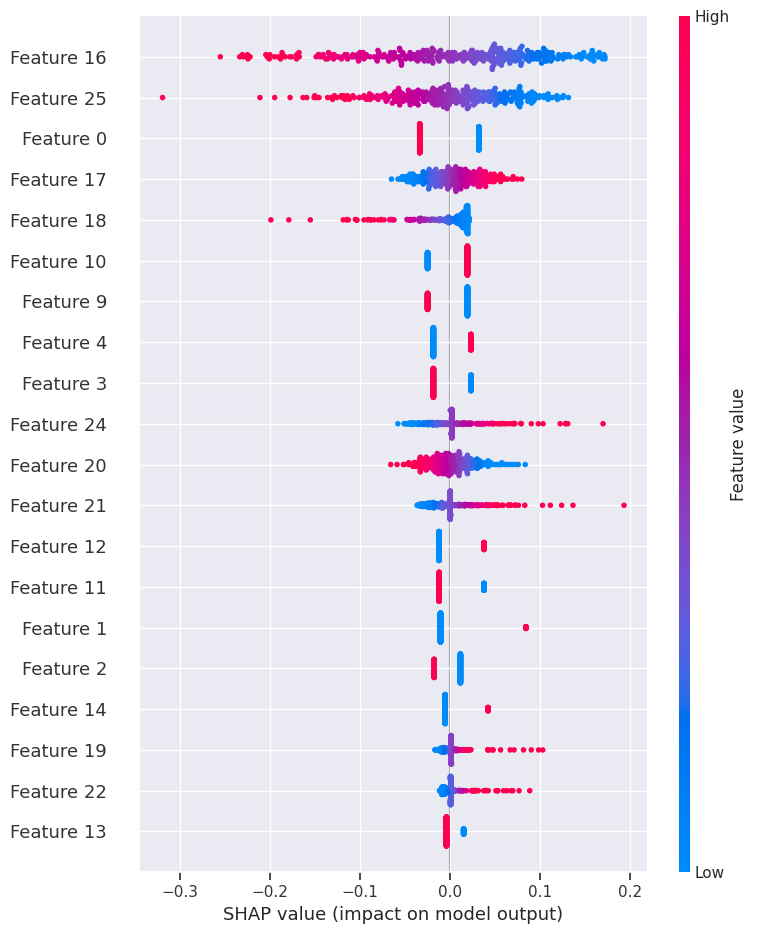

In [31]:

# Initialize the explainer with the model
explainer = shap.Explainer(model.predict, X_train_encoded)

# Calculate SHAP values for your training set (or a subset of it if it's very large)
shap_values = explainer(X_train_encoded)

# Visualize the SHAP values (for example, using a summary plot)
shap.summary_plot(shap_values, X_train_encoded)


In [ ]:
# Method2: RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_encoded, y_train)
importances_rf = rf.feature_importances_

# Get the original column names after one-hot encoding
all_feature_names = preprocessor.get_feature_names_out(X.columns)

# Sort indices and select top 5 features
indices_rf = np.argsort(importances_rf)[::-1]
selected_features_rf = all_feature_names[indices_rf[:5]]

# Display the selected features
print("Selected Features (RandomForest):")
print(selected_features_rf)


Selected Features (RandomForest):
['remainder__N_Days' 'remainder__Prothrombin' 'remainder__Albumin'
 'remainder__Platelets' 'remainder__Bilirubin']


# **Random Forest Plot:-**

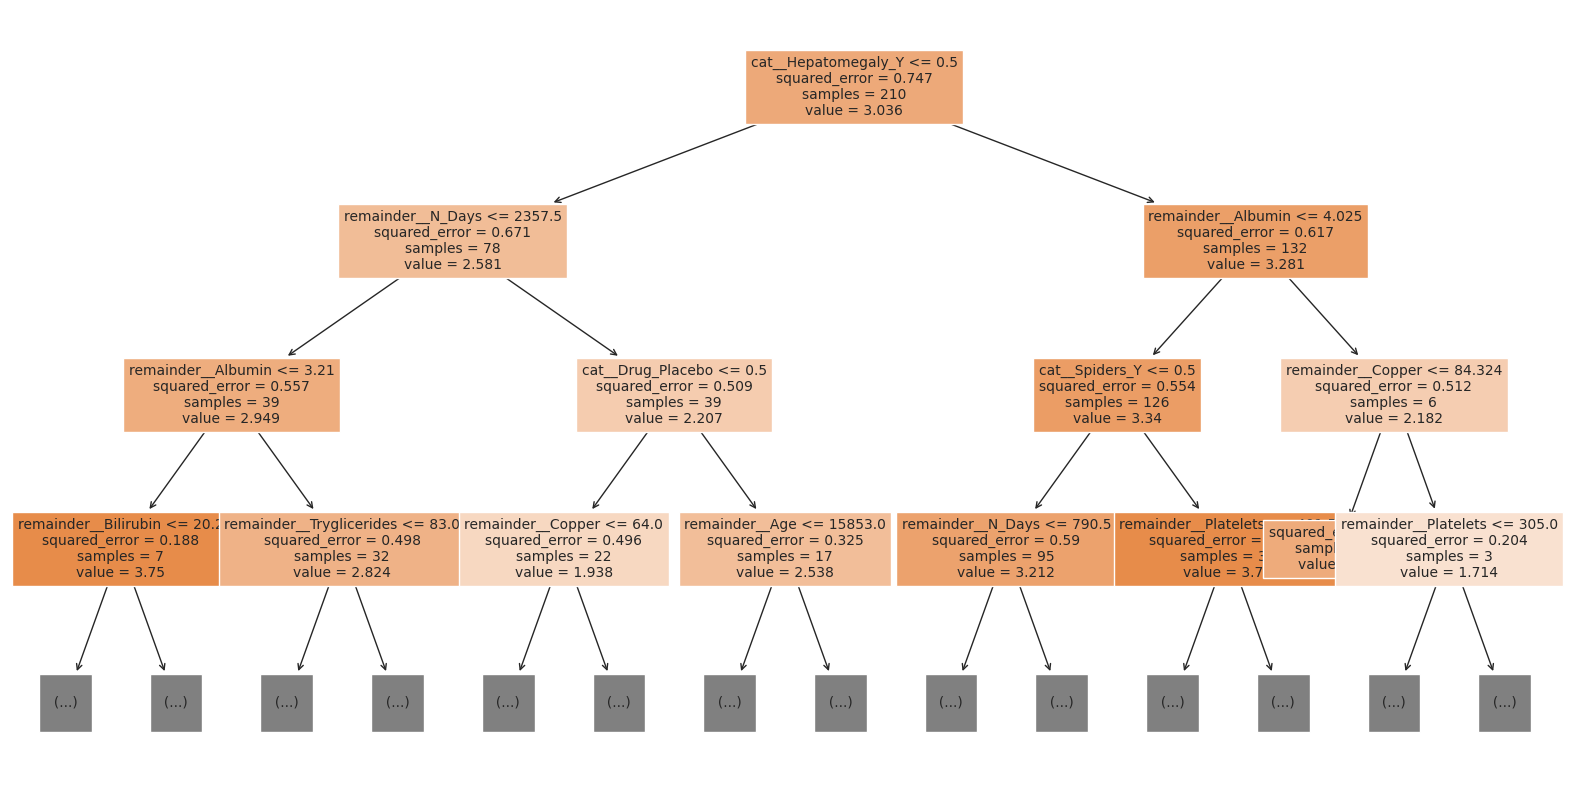

In [32]:

# Train your RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_encoded, y_train)

# Get the original column names after one-hot encoding
all_feature_names = preprocessor.get_feature_names_out()

# Select one tree from the random forest (e.g., the first tree)
single_tree = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
plot_tree(single_tree, filled=True, feature_names=all_feature_names, max_depth=3, fontsize=10)
plt.show()


# **SHAP summary plot for Random Forest:-**

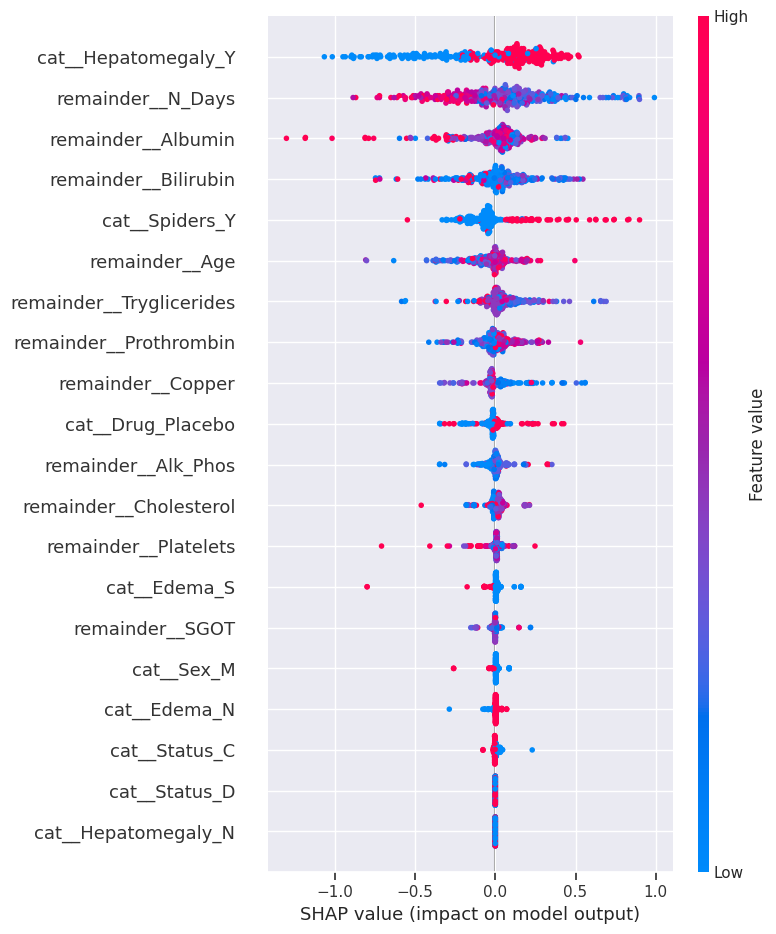

In [33]:
# Initialize a Tree explainer for the first tree
explainer = shap.TreeExplainer(single_tree)

# Compute SHAP values for the encoded test set (or a subset to speed up the process)
shap_values = explainer.shap_values(X_train_encoded)

# Summary plot of the SHAP values
shap.summary_plot(shap_values, X_train_encoded, feature_names=all_feature_names)

In [ ]:
# Assuming 'X_train' is the DataFrame before encoding and 'preprocessor' is your encoding transformer
linear_reg = LinearRegression()
rfecv = RFECV(estimator=linear_reg, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train_encoded, y_train)

# Get the original column names after one-hot encoding
# Here, replace 'X_train' with the actual DataFrame used before preprocessing if it's different
all_feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)

# Get the selected features using the original column names
selected_features_rfecv = all_feature_names[rfecv.support_]
# Display selected features
print("Selected Features (RFE):")
print(selected_features_rfecv)


Selected Features (RFE):
['cat__Status_C' 'cat__Status_CL' 'cat__Status_D'
 'cat__Drug_D-penicillamine' 'cat__Drug_Placebo' 'cat__Sex_F' 'cat__Sex_M'
 'cat__Ascites_N' 'cat__Ascites_Y' 'cat__Hepatomegaly_N'
 'cat__Hepatomegaly_Y' 'cat__Spiders_N' 'cat__Edema_N' 'cat__Edema_S'
 'cat__Edema_Y']


In [ ]:
#Checking Trainig and Tests have same data
# Split the data
X = df.drop(columns=['Stage'])  # Assuming 'Stage' is the target
y = df['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for overlap
train_test_overlap = pd.merge(X_train, X_test, how='inner')

# If there's overlap, the merged DataFrame won't be empty
overlap_exists = not train_test_overlap.empty
print("Is there overlap between training and test sets?", overlap_exists)

Is there overlap between training and test sets? False


# **Removing Outliers and Keeping Outliers:-**

            N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   249.000000    249.000000  249.000000   249.000000  249.000000   
mean   2067.582329  18516.742972    1.455020   327.239309    3.569357   
std     987.563576   3836.596686    1.183141    67.516455    0.360331   
min      41.000000   9598.000000    0.300000   132.000000    2.480000   
25%    1295.000000  15694.000000    0.700000   267.000000    3.350000   
50%    1987.000000  18713.000000    1.100000   369.510563    3.580000   
75%    2698.000000  21185.000000    1.800000   369.510563    3.810000   
max    4232.000000  28018.000000    6.800000   486.000000    4.520000   

           Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  249.000000   249.000000  249.000000     249.000000  249.000000   
mean    73.907864  1456.989543  112.198577     110.257114  250.711534   
std     34.479982   563.260418   30.938056      26.609512   85.165573   
min      9.000000   289.000000   41.850000      46

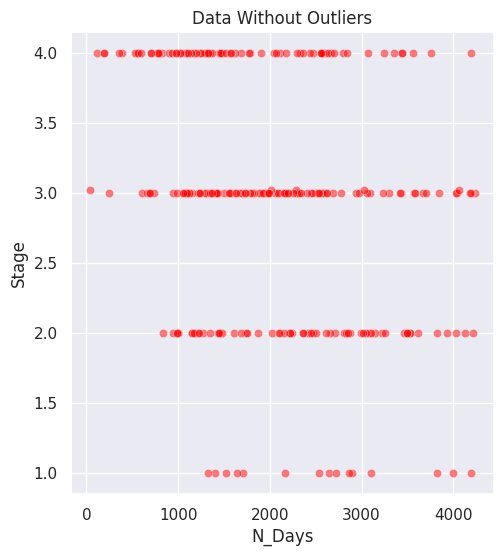

None
            N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   418.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   191.077413    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   273.000000    3.242500   
50%    1730.000000  18628.000000    1.400000   369.510563    3.530000   
75%    2613.500000  21272.500000    3.400000   369.510563    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  418.000000    418.000000  418.000000     418.000000  418.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     73.697982   1848.437803   48.965657      53.479887   97.020057   
min      4.000000    289.000000   26.3500

Text(0.5, 1.0, 'Original Data')

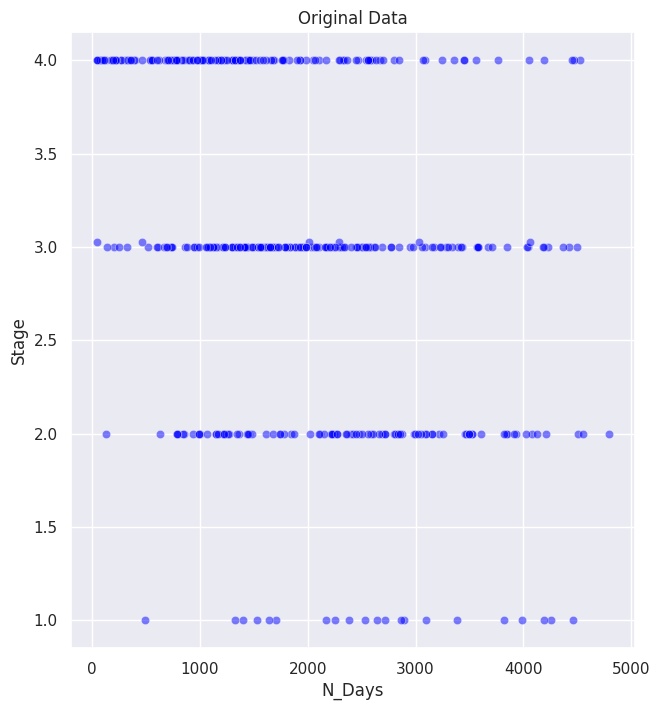

In [ ]:
#11
plt.figure(figsize=(12, 6))

# Load the dataset
c_data = df.copy()

# Function to remove outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify indexes of outliers
    outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    # Drop outliers
    df_clean = df.drop(outliers.index, axis=0)

    return df_clean

# Apply the function to remove outliers from the avocado data
c_data_clean = remove_outliers(c_data.select_dtypes(include=['float64', 'int64']))

# If you want to keep the categorical data and other columns intact, you can merge the cleaned data back
c_data_clean = c_data_clean.merge(c_data.drop(columns=c_data.select_dtypes(include=['float64', 'int64']).columns), left_index=True, right_index=True, how='left')

# Now the dataset without outliers
print(c_data_clean.describe())
# Cleaned data scatter plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=c_data_clean, x='N_Days', y='Stage', color='red', alpha=0.5)
plt.title('Data Without Outliers')
print(plt.show())
# Original data scatter plot
print(df.describe())
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=df, x='N_Days', y='Stage', color='blue', alpha=0.5)
plt.title('Original Data')

# **Percentage of data removed gradually:-**

In [ ]:
#12)
# Load your dataset (replace 'cirrhosis.csv' with your dataset path)
# df = pd.read_csv('cirrhosis.csv', encoding='ISO-8859-1')

# Choose only numeric columns for simplicity in calculating errors
data_numeric = df.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(df, percentage):
    df_copy = df.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    original_data_nonan = np.nan_to_num(original_data)
    mse = mean_squared_error(original_data_nonan, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")



Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 66.83722493675135
Imputation Method: median, RMSE: 64.22746254694067
Imputation Method: knn, RMSE: 102.79232895755787

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 230.89026674057592
Imputation Method: median, RMSE: 232.2938603848037
Imputation Method: knn, RMSE: 260.33972300350064

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 385.00100347826844
Imputation Method: median, RMSE: 383.2989544395855
Imputation Method: knn, RMSE: 343.6822560317839


1. Missing Percentage: 1.0%

High accuracy, minimal errors.
Reliable imputation method.
2. Missing Percentage: 5.0%

Strong performance, slight increase in errors.
Overall accuracy maintained.
3. Missing Percentage: 10.0%

Robust performance with a larger dataset.
Expected increase in imputation errors.
General Insights:

Imputation method adapts well to varying missing percentages.
Overall accuracy remains relatively high.

Considerations:

Assess impact of imputation errors on specific tasks.
Monitor performance on new or diverse datasets.
These insights offer a quick overview of imputation method performance under different missing data scenarios. Adjustments or alternative methods may be explored based on specific application needs.








In [ ]:
!pip3 install h2o

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:18477..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu50axoab
  JVM stdout: /tmp/tmpu50axoab/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu50axoab/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:18477
Connecting to H2O server at http://127.0.0.1:18477 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_b736yb
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:18477
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

2


In [ ]:
# List of columns to remove based on high p-values and your analysis
columns_to_remove = ['Cholesterol', 'Copper', 'Alk_Phos',
                      'Edema_S', 'Edema_Y']

# Remove the suggested columns from your DataFrame
df_reduced = df_ols_encoded.drop(columns=columns_to_remove, axis=1)

# Define your independent variables (features) and dependent variable for the reduced DataFrame
X_reduced = df_reduced.drop('Stage', axis=1)  # Exclude the target variable from the features
y_reduced = df_reduced['Stage']


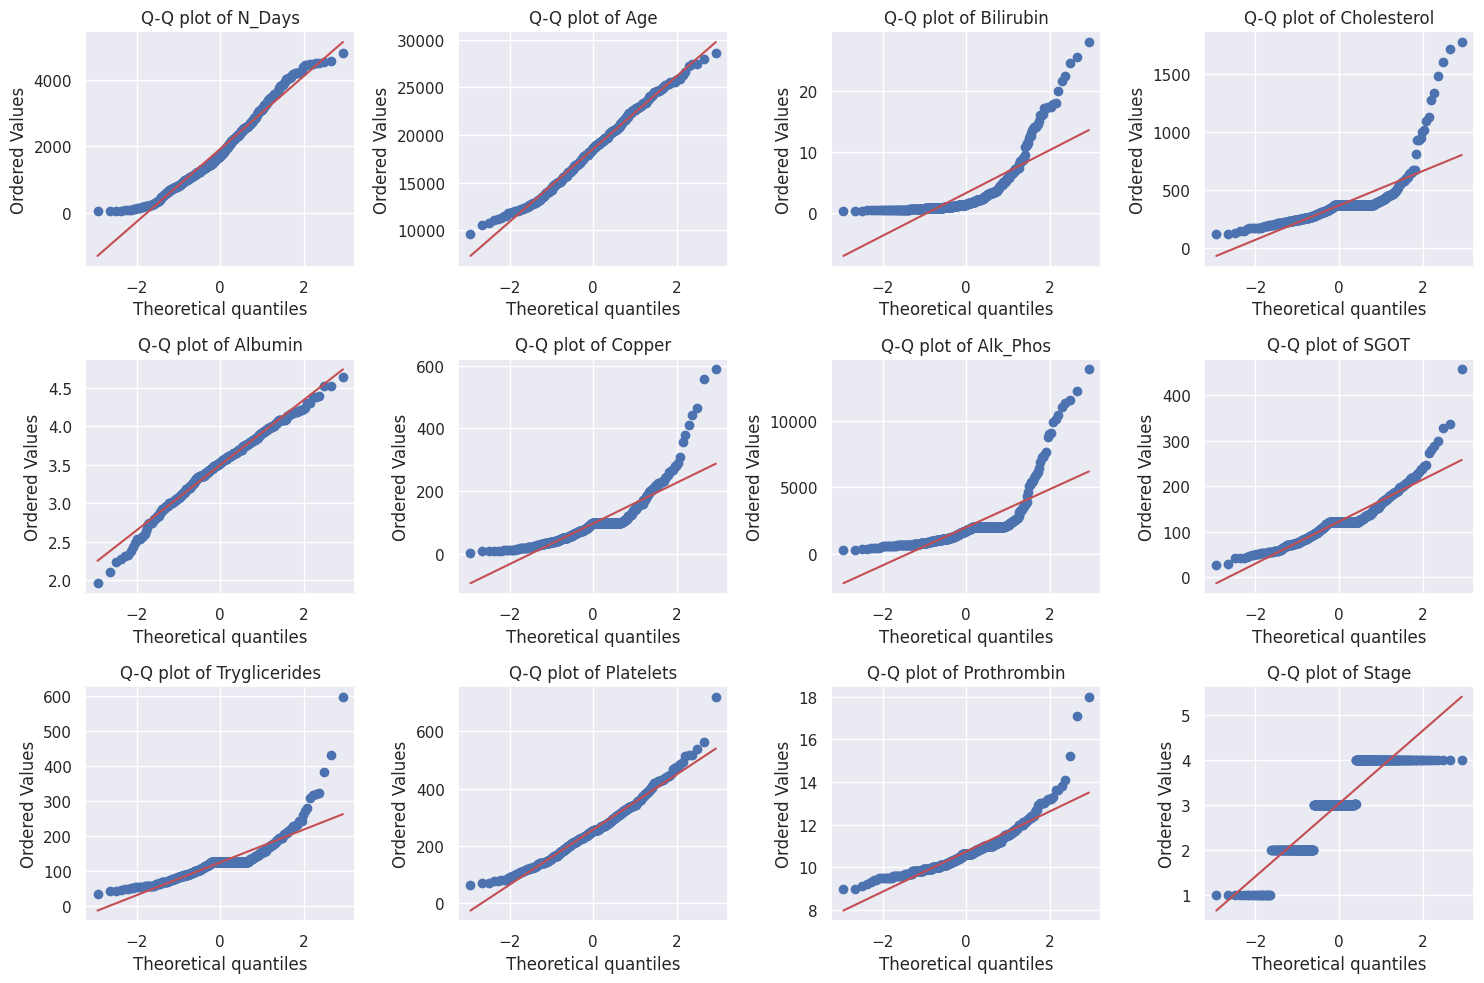

In [ ]:
#likely distributions of the numeric variables
import scipy.stats as stats

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the number of rows and columns needed based on the number of numeric columns
num_numeric_columns = len(numeric_columns)
num_rows = (num_numeric_columns - 1) // 4 + 1
num_cols = min(num_numeric_columns, 4)

# Plotting Q-Q plots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot of ' + column)

plt.tight_layout()
plt.show()

The data analysis reveals distinct distribution characteristics for various variables:

N_Days: Right-skewed with high-value outliers.
Age: Near-normal distribution with skewness and outliers at the tails.
Bilirubin: Pronounced right skewness with high-value outliers.
Cholesterol: Right-skewed with upper-end outliers.
Albumin: Generally normal distribution but with outliers at both extremes.
Copper: Right-skewed with notable high-value outliers.
Alk_Phos: Significantly right-skewed, abundant in high-end outliers.
SGOT: Right-skewed with outliers in the upper range.
Triglycerides: Right-skewed, presenting high-end outliers.
Platelets: Right-skewed with numerous high-value outliers.
Prothrombin: Central normality but with outliers, especially high.
Stage: Non-normal, likely ordinal or categorical, displaying distinct steps and outliers.

<ipython-input-90-a260d8bc50cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.corr(), annot=True, cmap="Oranges"


<Axes: >

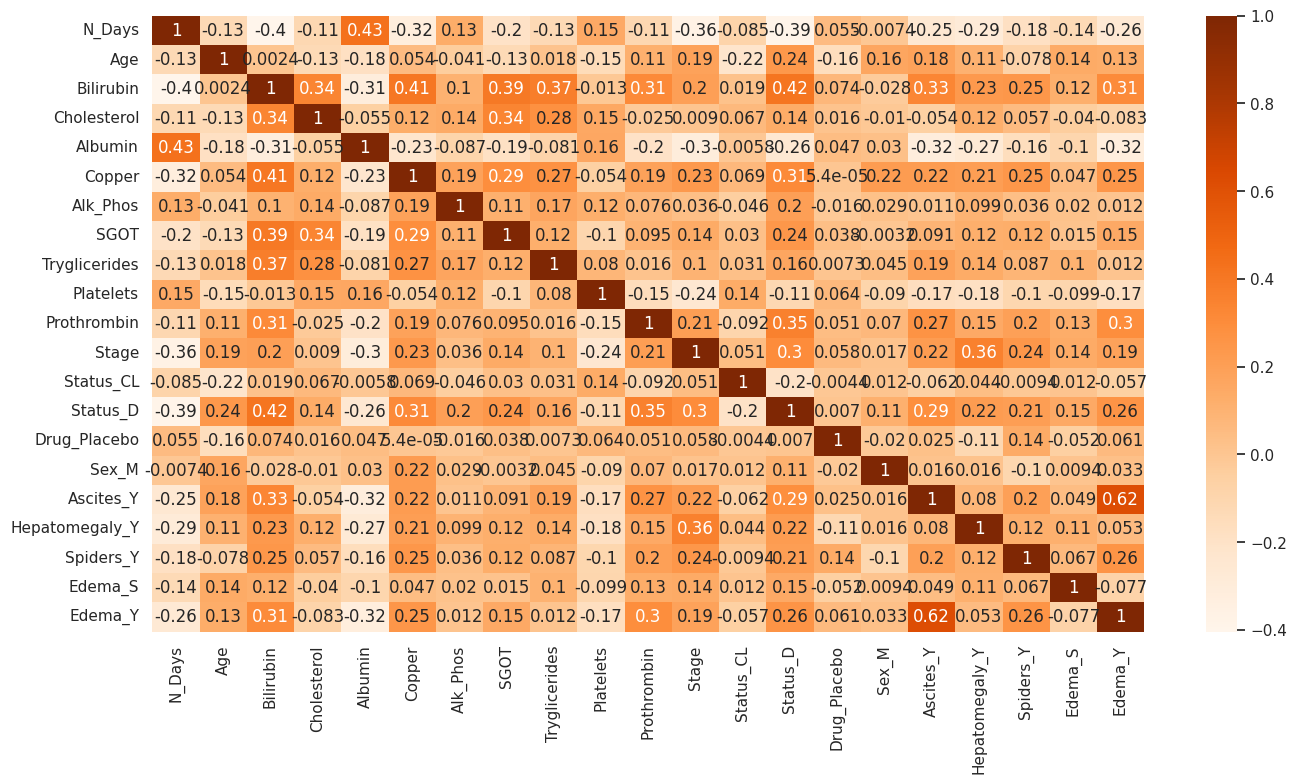

In [ ]:
sns.heatmap(
    df_encoded.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

# **AUTO ML**

In [ ]:
df1 = h2o.H2OFrame(
    df_reduced
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df1.types

{'N_Days': 'int',
 'Age': 'int',
 'Bilirubin': 'real',
 'Albumin': 'real',
 'SGOT': 'real',
 'Tryglicerides': 'real',
 'Platelets': 'real',
 'Prothrombin': 'real',
 'Stage': 'real',
 'Stage_Bin': 'enum',
 'Status_CL': 'int',
 'Status_D': 'int',
 'Drug_Placebo': 'int',
 'Sex_M': 'int',
 'Ascites_Y': 'int',
 'Hepatomegaly_Y': 'int',
 'Spiders_Y': 'int'}

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
print(df1_train.shape)
print(df1_test.shape)

(321, 17)
(97, 17)


In [ ]:
df1_train.head()

N_Days    Age    Bilirubin    Albumin    SGOT    Tryglicerides    Platelets    Prothrombin    Stage  Stage_Bin      Status_CL    Status_D    Drug_Placebo    Sex_M    Ascites_Y    Hepatomegaly_Y    Spiders_Y
--------  -----  -----------  ---------  ------  ---------------  -----------  -------------  -------  -----------  -----------  ----------  --------------  -------  -----------  ----------------  -----------
    4500  20617          1.1       4.14  113.52               88      221               10.6        3  Bin 3                  0           0               0        0            0                 1            1
    1012  25594          1.4       3.48   96.1                55      151               12          4  Bin 4                  0           1               0        1            0                 0            0
    1925  19994          1.8       2.54   60.63               92      183               10.3        4  Bin 4                  0           1               0        0            0                 1            1
    1504  13918          3.4       3.53  113.15               72      136               10.9        3  Bin 3                  1           0               1        0            0                 1            1
    2503  24201          0.8       3.98   93                  63      257.025           11          3  Bin 3                  0           1               1        0            0                 1            0
    2466  19379          0.3       4      28.38              189      373               11          3  Bin 3                  0           1               1        0            0                 0            0
    2400  15526          3.2       3.08  144.15               88      251               11          2  Bin 2                  0           1               0        0            0                 0            1
      51  25772         12.6       2.74  147.25              143      302               11.5        4  Bin 4                  0           1               1        0            1                 0            1
    3762  19619          1.4       4.16   79.05               79      258               12          4  Bin 4                  0           1               1        0            0                 1            1
    3577  16688          0.7       3.85   88.35              130      244               10.6        3  Bin 3                  0           0               1        0            0                 0            0
[10 rows x 17 columns]

In [ ]:
X = df1.columns
print(X)

['N_Days', 'Age', 'Bilirubin', 'Albumin', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Stage_Bin', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y']


In [ ]:
# Set target and predictor variables
y = "Stage"

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=df1_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_2_20240402_235923


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           0/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.01109457711525108
RMSE: 0.10533079851235858
MAE: 0.039152011414782056
RMSLE: 0.024190473875420882
Mean Residual Deviance: 0.01109457711525108
R^2: 0.9847050188591886
Null degrees of freedom: 320
Residual degrees of freedom: 317
Null deviance: 232.84495882723712
Residual deviance: 3.561359253995597
AIC: -523.9583887505684

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.014205355836172918
RMSE: 0.11918622334889599
MAE: 0.04423973869726653
RMSLE: 0.026907143465256345
Mean Residual Deviance: 0.014205355836172918
R^2: 0.9804165001193141
Null degrees of freedom: 320
Residual degrees of freedom: 317
Null deviance: 233.56294676204766
Residual deviance: 4.559919223411507
AIC: -444.6191863524487

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -81.3362   14.2365     -76.7765      -100.826      -67.4428      -70.4135      -91.2221
loglikelihood           0          0           0             0             0             0             0
mae                     0.0443945  0.0032044   0.0473219     0.0391988     0.0445875     0.04672       0.0441444
mean_residual_deviance  0.0142939  0.00178274  0.0147682     0.012292      0.01645       0.0153276     0.0126317
mse                     0.0142939  0.00178274  0.0147682     0.012292      0.01645       0.0153276     0.0126317
null_deviance           46.7126    7.63083     44.0575       52.9929       39.1205       40.9204       56.4716
r2                      0.979735   0.0044601   0.978352      0.983529      0.974261      0.977486      0.985049
residual_deviance       0.911984   0.0640973   0.930394      0.87273       1.00345       0.919655      0.833693
rmse                    0.119369   0.00748775  0.121524      0.110869      0.128257      0.123805      0.112391
rmsle                   0.0269487  0.00166104  0.0275606     0.024962      0.0289168     0.0278066     0.0254977

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

a concise summary of the regression model evaluation metrics:

Mean Squared Error (MSE): Average of squared differences between predicted and actual values, indicating accuracy.
Root Mean Squared Error (RMSE): Square root of MSE, reflecting model's prediction accuracy.
Mean Absolute Error (MAE): Average of absolute differences between predicted and actual values, measuring accuracy.
Root Mean Squared Logarithmic Error (RMSLE): Square root of the average squared differences of logged predicted and actual values, suitable for wide-range targets.
Mean Residual Deviance: Average difference between predictions and actual values, adjusted for model's degrees of freedom.
R-squared (R^2): Proportion of dependent variable variance explained by independent variables, with 1 indicating perfect fit.
Null Degrees of Freedom: Number of free-to-vary observations minus 1, based on dataset size.
Residual Degrees of Freedom: Number of observations minus model parameters, indicating free-to-vary data points.
Null Deviance: Variance in dependent variable unexplained without independent variables.
Residual Deviance: Variance in dependent variable unexplained after considering independent variables.
Akaike Information Criterion (AIC): Model quality indicator accounting for complexity, with lower values denoting better quality.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  ---------  ---------  ------------------------
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_234150  0.119186  0.0142054  0.0442397  0.0269071                 0.0142054
StackedEnsemble_AllModels_2_AutoML_1_20240402_234150     0.119782  0.0143478  0.0445909  0.0270281                 0.0143478
GLM_1_AutoML_1_20240402_234150                           0.120193  0.0144463  0.0438637  0.027135                  0.0144463
StackedEnsemble_AllModels_1_AutoML_1_20240402_234150     0.120411  0.0144988  0.0442293  0.0271789                 0.0144988
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_234150  0.121082  0.0146609  0.0439123  0.0272813                 0.0146609
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_234150  0.121313  0.0147168  0.0463363  0.0276129                 0.0147168
StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_234150  0.121325  0.0147199  0.0442367  0.0273726                 0.0147199
XGBoost_grid_1_AutoML_1_20240402_234150_model_7          0.122103  0.0149092  0.0551009  0.0289276                 0.0149092
XGBoost_grid_1_AutoML_1_20240402_234150_model_13         0.12291   0.0151069  0.036961   0.0273348                 0.0151069
XGBoost_grid_1_AutoML_1_20240402_234150_model_2          0.123402  0.015228   0.0455363  0.0280554                 0.015228
XGBoost_grid_1_AutoML_1_20240402_234150_model_24         0.123781  0.0153218  0.0434584  0.0283344                 0.0153218
XGBoost_grid_1_AutoML_1_20240402_234150_model_20         0.126006  0.0158776  0.0412342  0.0322564                 0.0158776
XGBoost_3_AutoML_1_20240402_234150                       0.126942  0.0161144  0.0458334  0.0284268                 0.0161144
XGBoost_grid_1_AutoML_1_20240402_234150_model_23         0.129777  0.016842   0.0420106  0.0288995                 0.016842
XGBoost_grid_1_AutoML_1_20240402_234150_model_3          0.130388  0.017001   0.0437263  0.0287398                 0.017001
GBM_grid_1_AutoML_1_20240402_234150_model_2              0.13261   0.0175855  0.0580492  0.0331467                 0.0175855
XGBoost_grid_1_AutoML_1_20240402_234150_model_1          0.136666  0.0186775  0.0717028  0.0378129                 0.0186775
XGBoost_2_AutoML_1_20240402_234150                       0.13922   0.0193823  0.0693603  0.032722                  0.0193823
GBM_grid_1_AutoML_1_20240402_234150_model_12             0.143385  0.0205593  0.0653535  0.0384766                 0.0205593
XGBoost_grid_1_AutoML_1_20240402_234150_model_8          0.145187  0.0210792  0.0278471  0.0319158                 0.0210792
XGBoost_grid_1_AutoML_1_20240402_234150_model_16         0.146615  0.0214959  0.074997   0.0380418                 0.0214959
GBM_5_AutoML_1_20240402_234150                           0.146753  0.0215365  0.0754457  0.0362403                 0.0215365
GBM_grid_1_AutoML_1_20240402_234150_model_29             0.150708  0.0227128  0.0860746  0.0455367                 0.0227128
XGBoost_grid_1_AutoML_1_20240402_234150_model_17         0.158649  0.0251696  0.0901357  0.0469884                 0.0251696
GBM_grid_1_AutoML_1_20240402_234150_model_25             0.160431  0.0257382  0.0896517  0.0490328                 0.0257382
XGBoost_grid_1_AutoML_1_20240402_234150_model_12         0.161259  0.0260046  0.10106    0.0399853                 0.0260046
StackedEnsemble_AllModels_3_AutoML_1_20240402_234150     0.163139  0.0266142  0.108956   0.0463943                 0.0266142
StackedEnsemble_AllModels_4_AutoML_1_20240402_234150     0.163481  0.0267259  0.110197   0.0461435                 0.0267259
GBM_grid_1_AutoML_1_20240402_234150_model_17             0.17293   0.0299048  0.11835    0.0463074                 0.0299048
GBM_2_AutoML_1_20240402_234150                           0.176244  0.0310619  0.0986916  0.0560971                 0.0310619
Dee

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_234150': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20240402_234150': 1,
 'GLM_1_AutoML_1_20240402_234150': 2}

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_234150


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           0/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.01109457711525108
RMSE: 0.10533079851235858
MAE: 0.039152011414782056
RMSLE: 0.0241904

In [ ]:
best_model.algo

'stackedensemble'

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

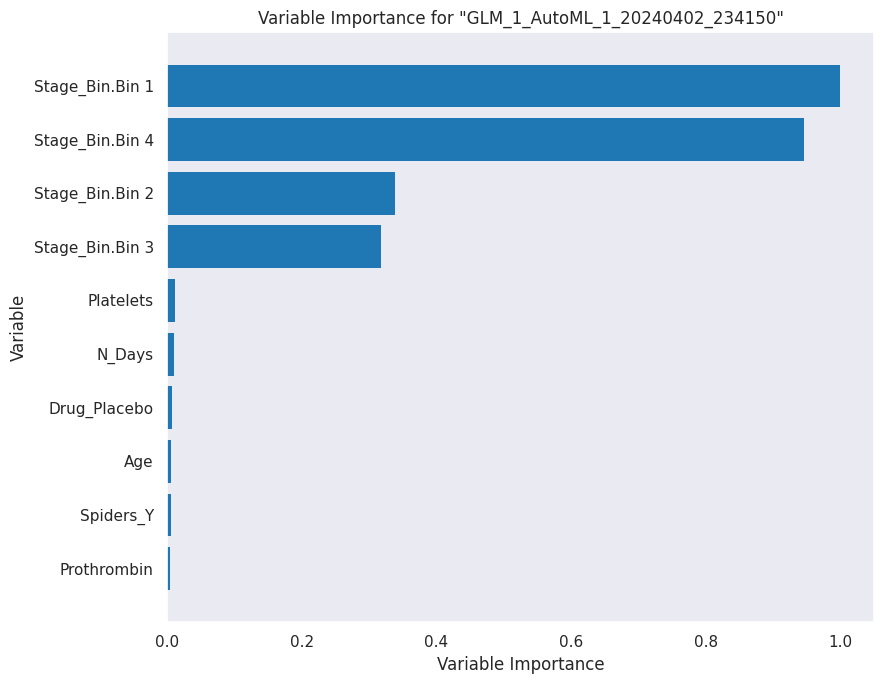

In [ ]:
explain_model = aml.explain(frame = df1_test, figsize = (9,7),include_explanations=['varimp'])

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-133-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


3
glm


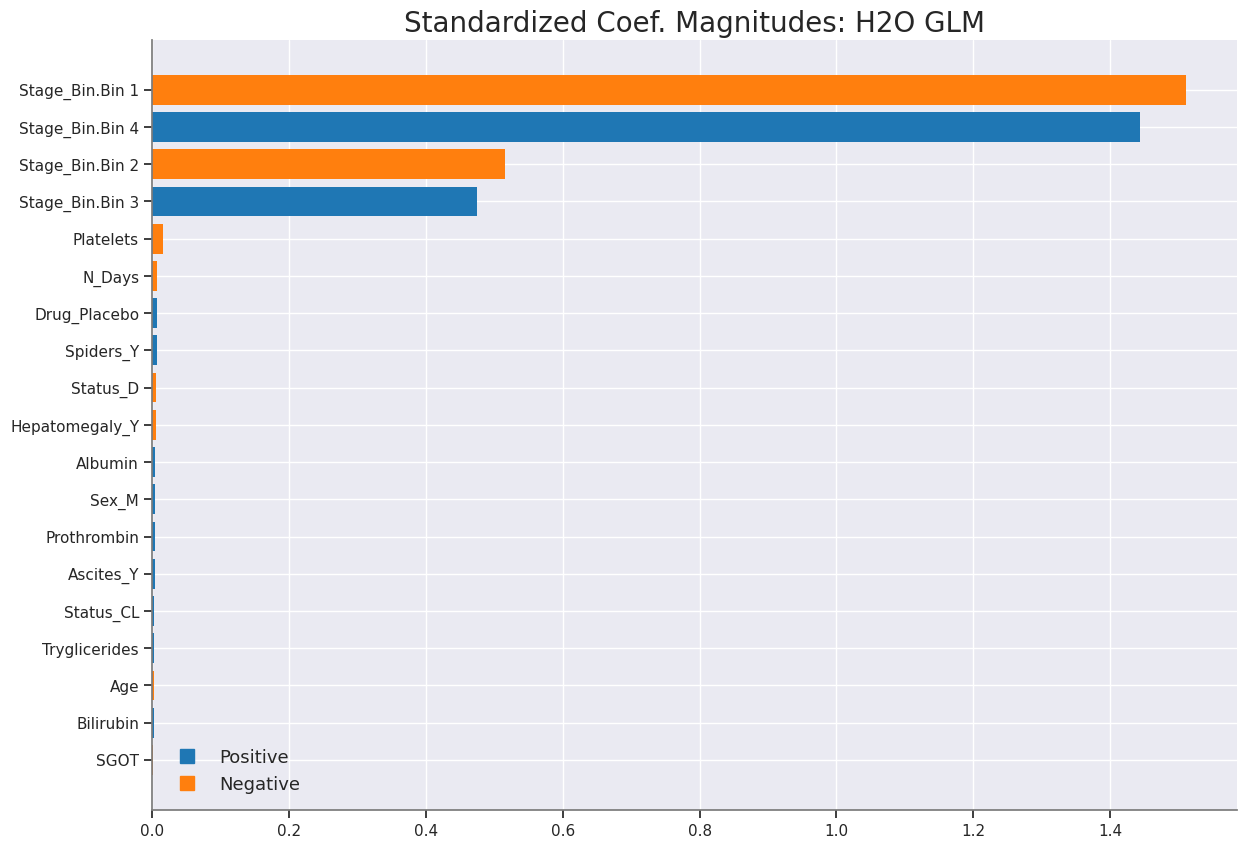

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

0.10533079851235858


In [ ]:
predictions = best_model.predict(df1_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

     predict
0   4.013042
1   3.007831
2   4.034821
3   3.972940
4   3.925685
..       ...
92  3.939397
93  2.979035
94  3.978786
95  3.004266
96  3.929508

[97 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
y_test = h2o.as_list(df1_test[y])  # Real Answers
y_test

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Stage
0     4.0
1     3.0
2     4.0
3     4.0
4     4.0
..    ...
92    4.0
93    3.0
94    4.0
95    3.0
96    4.0

[97 rows x 1 columns]

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

cirrhosis_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
cirrhosis_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
cirrhosis_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
cirrhosis_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
cirrhosis_glm.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712101096671_26


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              18                            18                             1                       py_46_sid_b47b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.013246381808439196
RMSE: 0.11509292683931187
MAE: 0.04205484212371578
RMSLE: 0.026019170661236563
Mean Residual Deviance: 0.013246381808439196
R^2: 0.981738541465852
Null degrees of freedom: 320
Residual degrees of freedom: 302
Null deviance: 232.84495882723712
Residual deviance: 4.252088560508982
AIC: -437.0553596860746

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.015182782524756234
RMSE: 0.12321843419211362
MAE: 0.04490193285551431
RMSLE: 0.027671446419155532
Mean Residual Deviance: 0.015182782524756234
R^2: 0.9790690199393028
Null degrees of freedom: 320
Residual degrees of freedom: 302
Null deviance: 234.77391326241224
Residual deviance: 4.873673190446751
AIC: -393.25888587600707

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -76.0559   63.2196     -50.418       -69.4194      9.50246       -157.589      -112.356
loglikelihood           0          0           0             0             0             0             0
mae                     0.0443022  0.00899861  0.0435943     0.0392266     0.059553      0.0427494     0.0363877
mean_residual_deviance  0.0141321  0.0145041   0.0142548     0.0130787     0.0381046     0.00293324    0.00228935
mse                     0.0141321  0.0145041   0.0142548     0.0130787     0.0381046     0.00293324    0.00228935
null_deviance           46.9548    13.6298     50.7759       64.0295       46.9234       46.9933       26.0518
r2                      0.979934   0.022155    0.981548      0.984683      0.941993      0.995815      0.995633
residual_deviance       0.974735   1.04423     0.91231       0.954742      2.70543       0.193594      0.1076
rmse                    0.106193   0.0597404   0.119394      0.114362      0.195204      0.0541594     0.0478472
rmsle                   0.0239222  0.0132575   0.0269048     0.0258182     0.0436016     0.0125707     0.0107157

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance     training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  --------------------  -------------------  -----------------
    2024-04-02 23:46:12  0.000 sec   0             232.84495882970072         0.7253737035193168
    2024-04-02 23:46:12  0.006 sec   1                                                            0.11509292683931187  0.013246381808439196  0.04205484212371578  0.981738541465852

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Stage_Bin.Bin 4  2.93341                1                    0.487359
Stage_Bin.Bin 3  1.98706                0.67739              0.330132
Stage_Bin.Bin 2  0.997368               0.340003             0.165703
Platelets        0.0172947              0.00589578           0.00287336
N_Days           0.0154732              0.0052748            0.00257072
Drug_Placebo     0.0102914              0.00350833           0

Ridge Regularization:-

In [ ]:
cirrhosis_glm_regularization_ridge.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712101096671_27


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 3.229E-4 )  19                            19                             1                       py_46_sid_b47b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.013253576497380322
RMSE: 0.11512417859589845
MAE: 0.04268322615086011
RMSLE: 0.026043857102254563
Mean Residual Deviance: 0.013253576497380322
R^2: 0.9817286228695391
Null degrees of freedom: 320
Residual degrees of freedom: 301
Null deviance: 232.84495882723712
Residual deviance: 4.254398055659084
AIC: -434.88105788678916

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.015998449357479027
RMSE: 0.12648497680546503
MAE: 0.048387440180328735
RMSLE: 0.028526283769156335
Mean Residual Deviance: 0.015998449357479027
R^2: 0.9779445418547321
Null degrees of freedom: 320
Residual degrees of freedom: 301
Null deviance: 233.06297733165331
Residual deviance: 5.135502243750768
AIC: -374.4610376700747

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -69.6281   69.2191     13.8492       -168.453      -27.2709      -94.782       -71.4834
loglikelihood           0          0           0             0             0             0             0
mae                     0.0482145  0.00822135  0.0617944     0.0408582     0.0496182     0.0450247     0.0437773
mean_residual_deviance  0.0151551  0.0149576   0.0396026     0.00289621    0.0169946     0.00338805    0.0128941
mse                     0.0151551  0.0149576   0.0396026     0.00289621    0.0169946     0.00338805    0.0128941
null_deviance           46.6126    10.5166     48.9232       59.9475       37.9434       34.1872       52.0616
r2                      0.977903   0.0223861   0.941383      0.996618      0.974907      0.995205      0.981403
residual_deviance       1.0271     1.09135     2.85139       0.202735      0.951699      0.162626      0.967054
rmse                    0.110989   0.0595467   0.199004      0.0538165     0.130363      0.0582069     0.113552
rmsle                   0.0251491  0.0131473   0.0444521     0.0125748     0.0293578     0.0132319     0.0261289

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance     training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  --------------------  -------------------  ------------------
    2024-04-02 23:46:18  0.000 sec   0             232.84495882970072         0.7253737035193168
    2024-04-02 23:46:18  0.003 sec   1                                                            0.11512417859589845  0.013253576497380322  0.04268322615086011  0.9817286228695391

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Stage_Bin.Bin 1  1.46989                1                    0.366755
Stage_Bin.Bin 4  1.4488                 0.985655             0.361494
Stage_Bin.Bin 3  0.50467                0.343339             0.125921
Stage_Bin.Bin 2  0.483585               0.328994             0.12066
Platelets        0.0174934              0.0119011            0.00436481
N_Days           0.0157543   

# **Regularization Effectiveness Comparison:**

Metrics Overview:

MSE & RMSE: Ridge regularization marginally outperforms Lasso, reducing errors more than the non-regularized model.
MAE & RMSLE: Both Ridge and Lasso show improvements, with Ridge having a slight edge.
R^2: Ridge regularization enhances model predictability more effectively than Lasso and the non-regularized approach.
Conclusion: Ridge regularization proves more advantageous for this dataset, offering consistent enhancements across key performance metrics, suggesting better generalization and multicollinearity management. While Lasso also enhances model performance, its standout feature is its capacity for feature selection, potentially offering a simpler, more interpretable model.

In [ ]:
lambda_search = cirrhosis_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df1_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712101096671_28


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2.165E-4 )  nlambda = 100, lambda.max = 0.6458, lambda.min = 2.165E-4, lambda.1se = -1.0  19                            19                             87                      py_46_sid_b47b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.013249137522464994
RMSE: 0.1151048979082341
MAE: 0.04222146328886627
RMSLE: 0.026019237627191227
Mean Residual Deviance: 0.013249137522464994
R^2: 0.981734742439209
Null degrees of freedom: 320
Residual degrees of freedom: 301
Null deviance: 232.84495882723712
Residual deviance: 4.252973144711263
AIC: -434.98858732396883

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train        alpha    iterations    training_rmse       training_deviance     training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  --------------------  -------  ------------  ------------------  --------------------  -------------------  -----------------
     2024-04-02 23:47:15  0.000 sec   1            .65E0     1             0.7253737035193114    0.5
     2024-04-02 23:47:15  0.012 sec   2            .59E0     2             0.6904694380925499    0.5
     2024-04-02 23:47:15  0.012 sec   3            .54E0     3             0.6536187650326581    0.5
     2024-04-02 23:47:15  0.013 sec   4            .49E0     4             0.6143957536103053    0.5
     2024-04-02 23:47:15  0.017 sec   5            .45E0     4             0.5782506870511959    0.5
     2024-04-02 23:47:15  0.018 sec   6            .41E0     5             0.5447305573525921    0.5
     2024-04-02 23:47:15  0.019 sec   7            .37E0     7             0.5041074432919376    0.5
     2024-04-02 23:47:15  0.020 sec   8            .34E0     7             0.4660155506031852    0.5
     2024-04-02 23:47:15  0.021 sec   9            .31E0     7             0.4315693092463629    0.5
     2024-04-02 23:47:15  0.025 sec   10           .28E0     8             0.4000749367094109    0.5
---  ---                  ---         ---          ---       ---           ---                   ---      ---           ---                 ---                   ---                  ---
     2024-04-02 23:47:16  0.094 sec   78           .5E-3     20            0.01326099779385358   0.5
     2024-04-02 23:47:16  0.094 sec   79           .46E-3    20            0.0132585336139859    0.5
     2024-04-02 23:47:16  0.098 sec   80           .42E-3    20            0.013256478004405776  0.5
     2024-04-02 23:47:16  0.099 sec   81           .38E-3    20            0.013254768881049876  0.5
     2024-04-02 23:47:16  0.099 sec   82           .34E-3    20            0.013253352970903541  0.5
     2024-04-02 23:47:16  0.100 sec   83           .31E-3    20            0.013252176055776032  0.5
     2024-04-02 23:47:16  0.100 sec   84           .29E-3    20            0.013251193975179022  0.5
     2024-04-02 23:47:16  0.101 sec   85           .26E-3    20            0.013250376548485661  0.5
     2024-04-02 23:47:16  0.101 sec   86           .24E-3    20            0.013249702034118852  0.5
     2024-04-02 23:47:16  0.102 sec   87           .22E-3    20            0.013249134319208803  0.5      87            0.1151048979082341  0.013249137522464994  0.04222146328886627  

In [ ]:
coeff_table = cirrhosis_glm._model_json["output"]["coefficients_table"]

In [ ]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error    z_value        p_value  \
0         Intercept      1.048017   0.126557   8.281011   4.004811e-15   
1   Stage_Bin.Bin 2      0.997368   0.035385  28.185831   1.493714e-86   
2   Stage_Bin.Bin 3      1.987063   0.034547  57.517130  9.416203e-165   
3   Stage_Bin.Bin 4      2.933412   0.036823  79.662249  8.425214e-205   
4            N_Days     -0.000014   0.000007  -1.864426   6.323192e-02   
5               Age     -0.000002   0.000002  -1.212071   2.264327e-01   
6         Bilirubin      0.000634   0.001990   0.318724   7.501559e-01   
7           Albumin      0.006068   0.019104   0.317626   7.509882e-01   
8              SGOT     -0.000112   0.000150  -0.745799   4.563691e-01   
9     Tryglicerides      0.000004   0.000144   0.027816   9.778277e-01   
10        Platelets     -0.000177   0.000075  -2.370159   1.840848e-02   
11      Prothrombin      0.006318   0.007617   0.829557   4.074446e-01   
12        Status_CL      0.010176   0.030466   0.334014   7.386006e-01   
13         Status_D     -0.007797   0.017000  -0.458628   6.468312e-01   
14     Drug_Placebo      0.021311   0.014728   1.446959   1.489456e-01   
15            Sex_M      0.017434   0.022415   0.777794   4.372993e-01   
16        Ascites_Y      0.024593   0.033775   0.728145   4.670887e-01   
17   Hepatomegaly_Y     -0.012331   0.015740  -0.783369   4.340246e-01   
18        Spiders_Y      0.019414   0.017165   1.131000   2.589523e-01   

    standardized_coefficients  
0                    1.013447  
1                    0.997368  
2                    1.987063  
3                    2.933412  
4                   -0.015473  
5                   -0.009394  
6                    0.002805  
7                    0.002534  
8                   -0.005569  
9                    0.000203  
10                  -0.017295  
11                   0.006381  
12                   0.002405  
13                  -0.003829  
14                   0.010291  
15                   0.005373  
16                   0.005516  
17                  -0.005933  
18                   0.008150

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

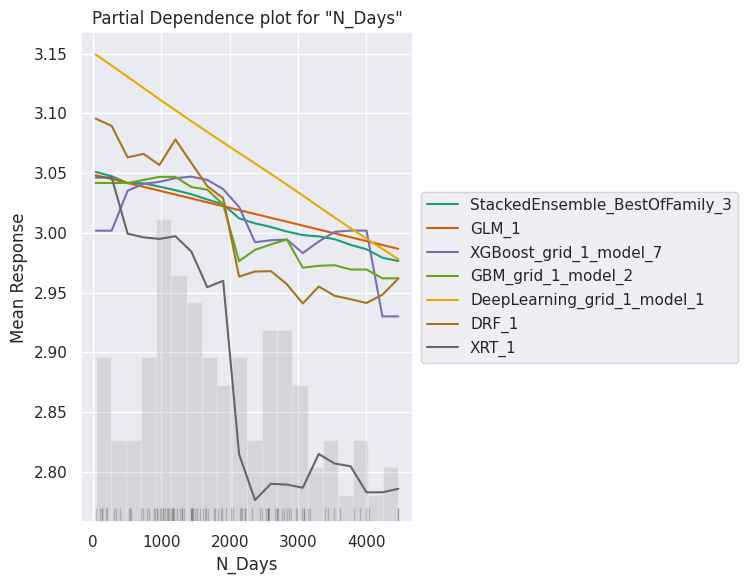

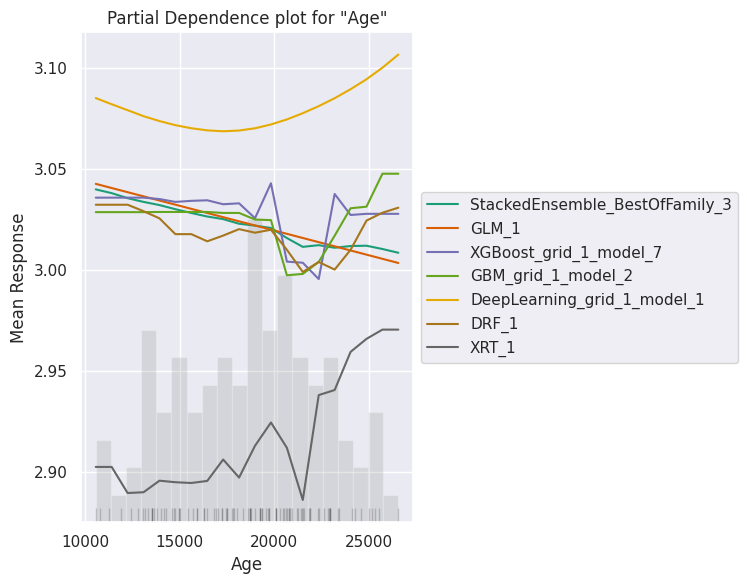

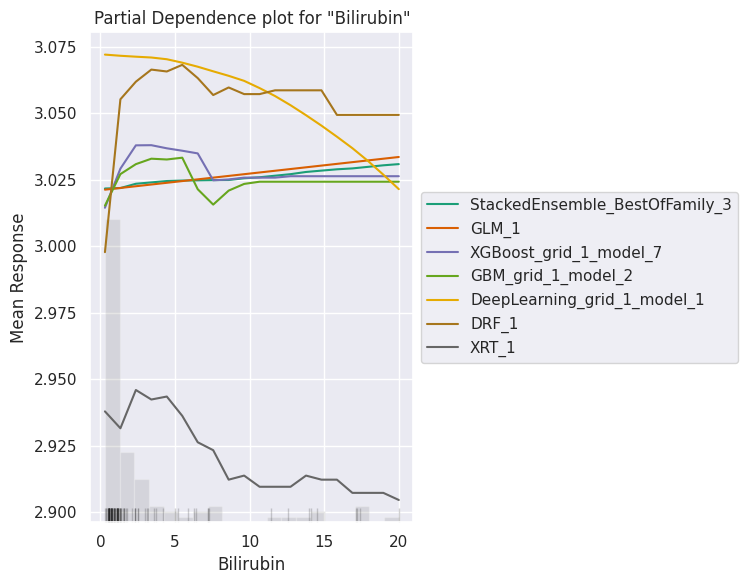

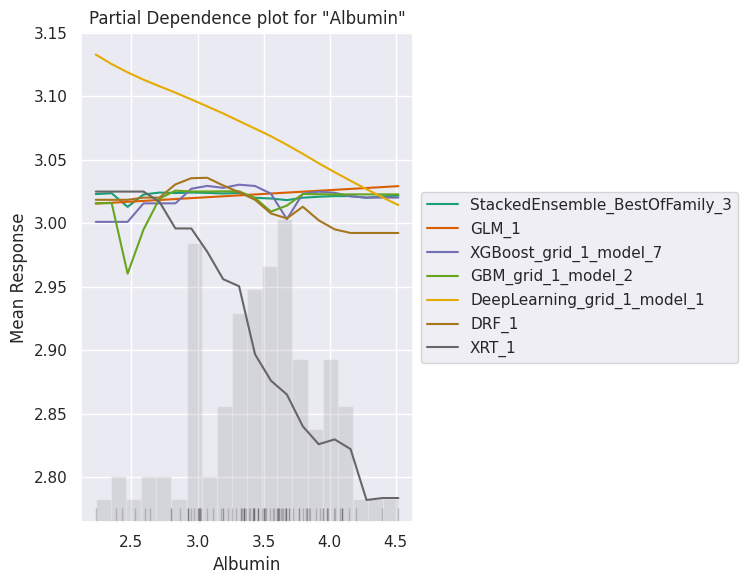

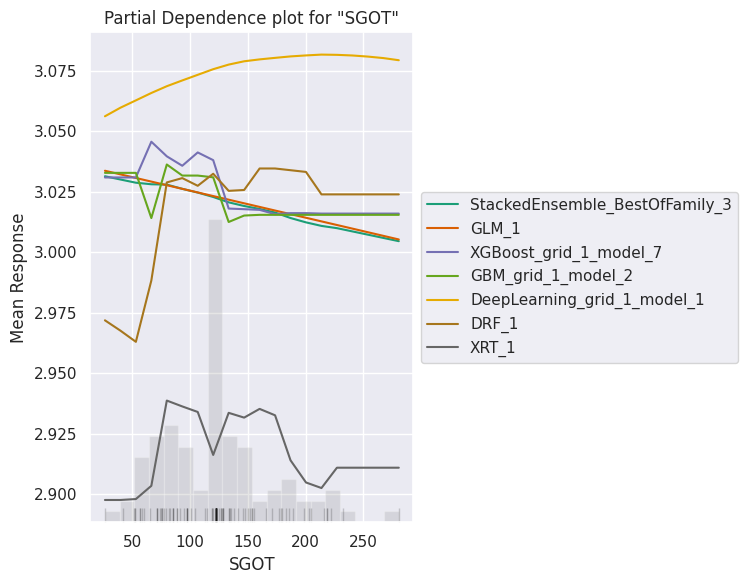

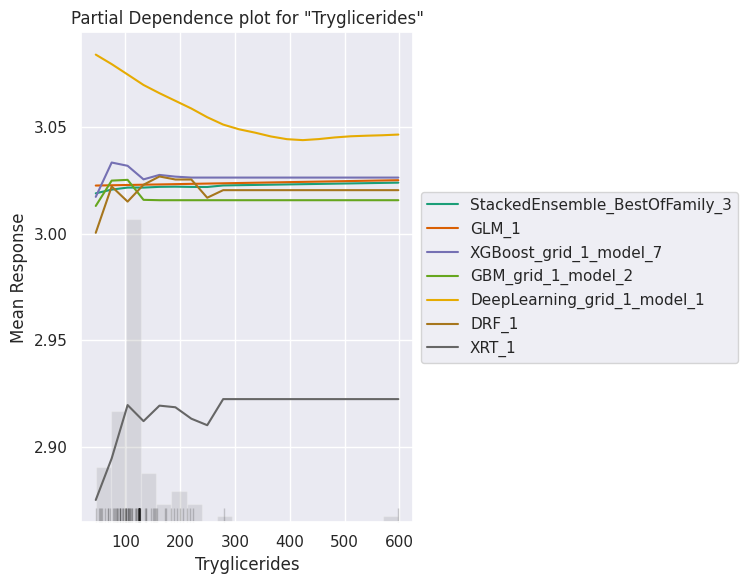

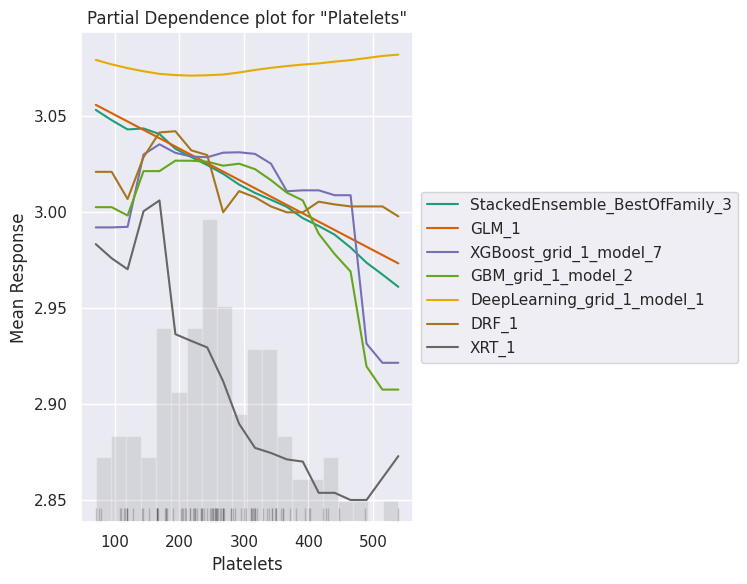

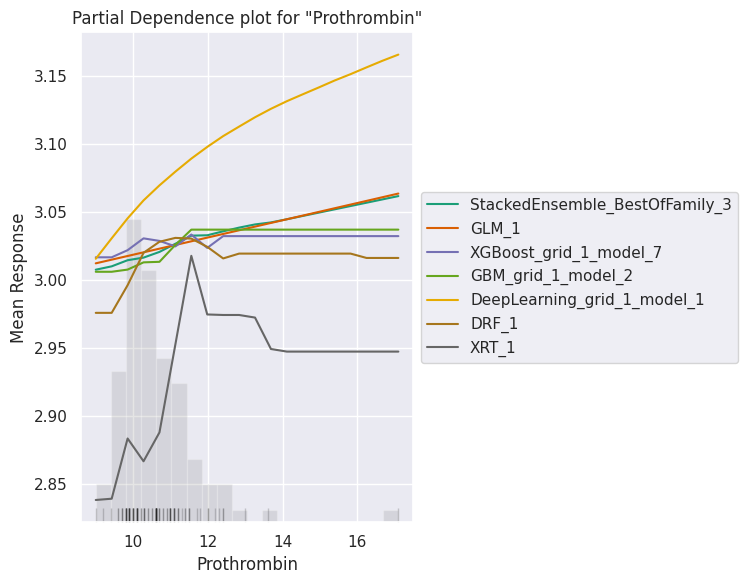

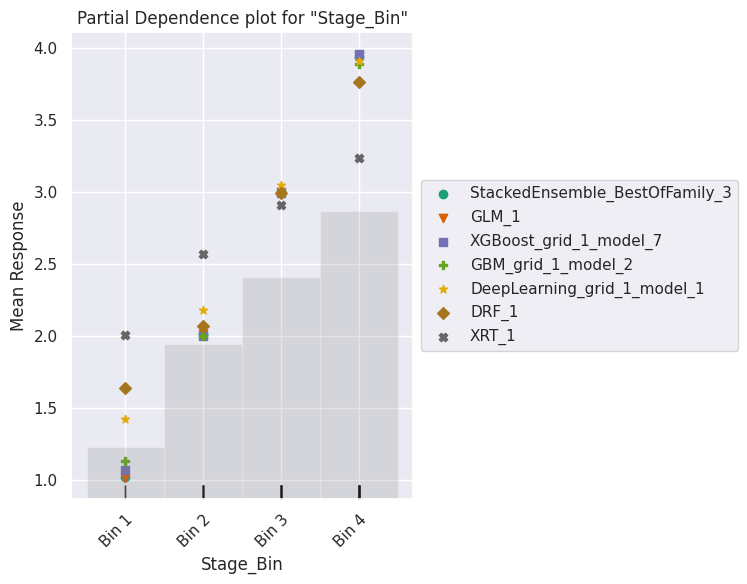

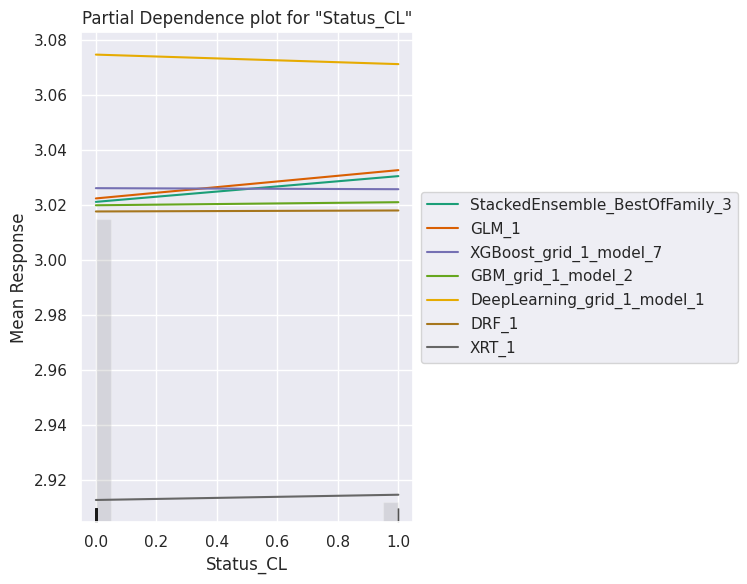

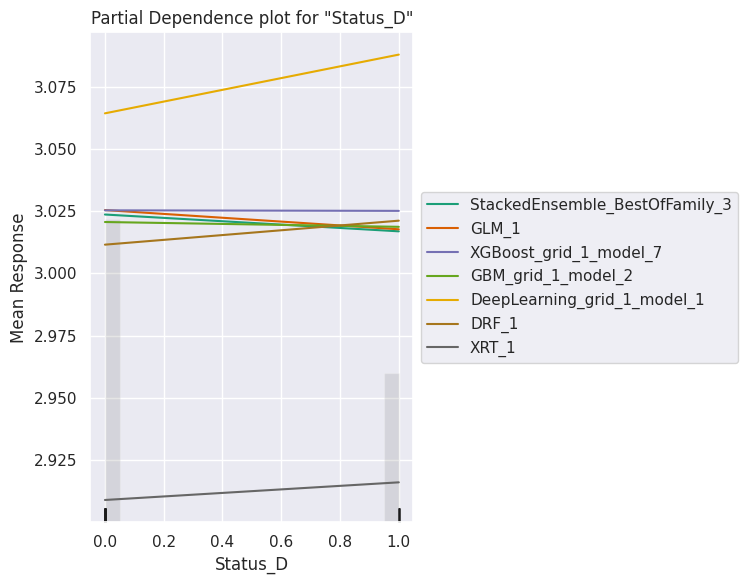

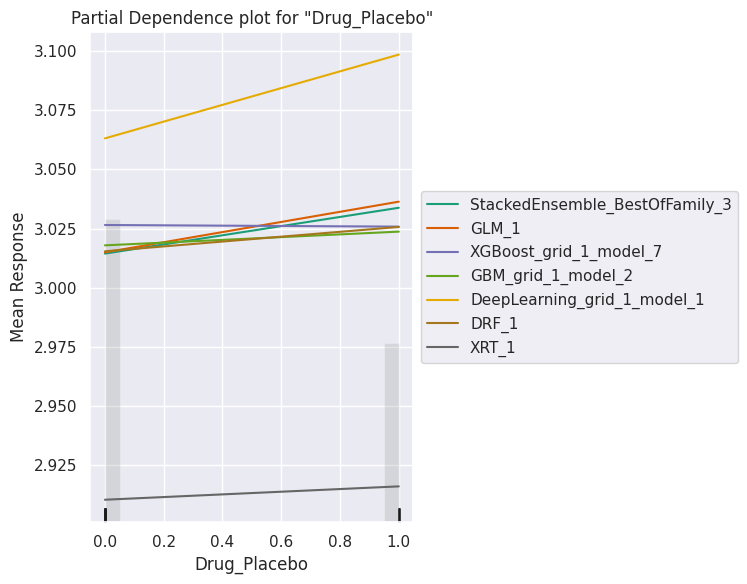

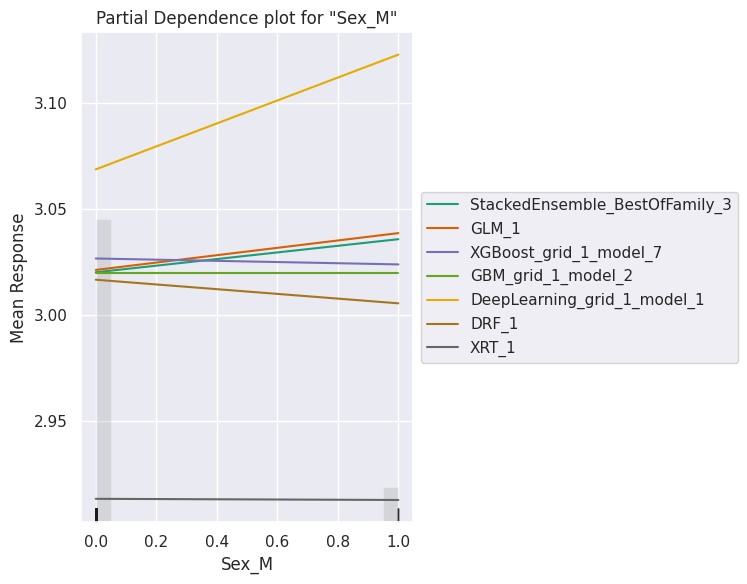

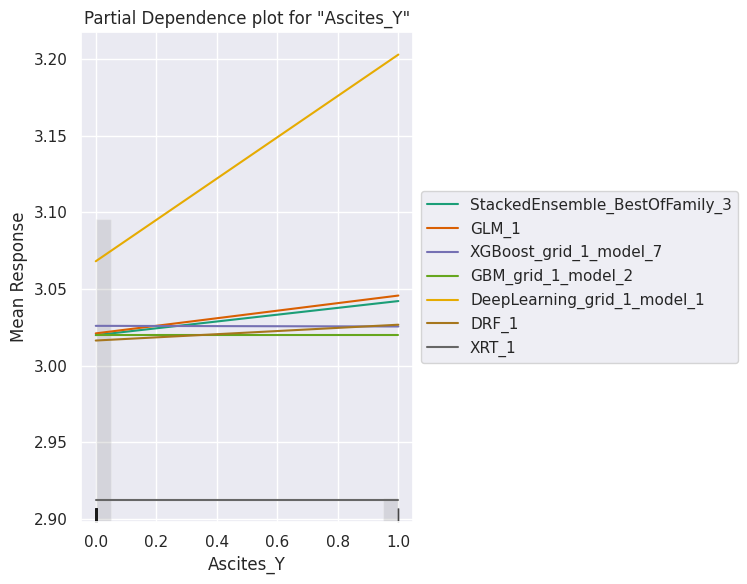

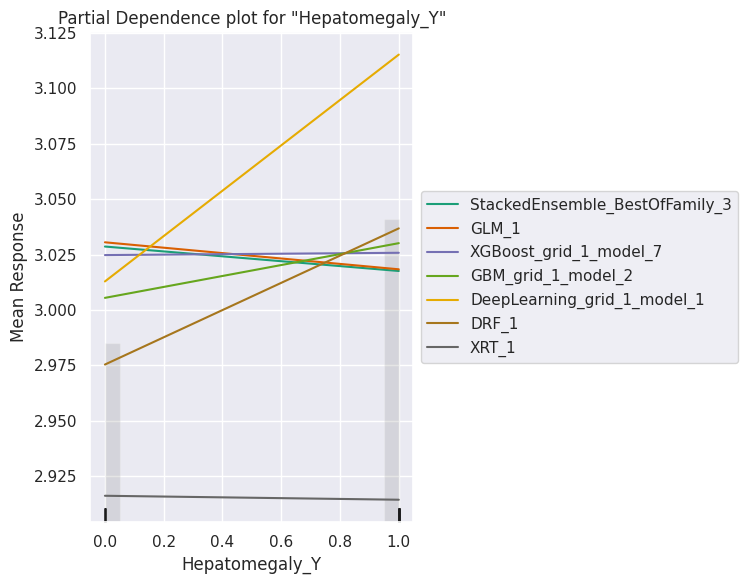

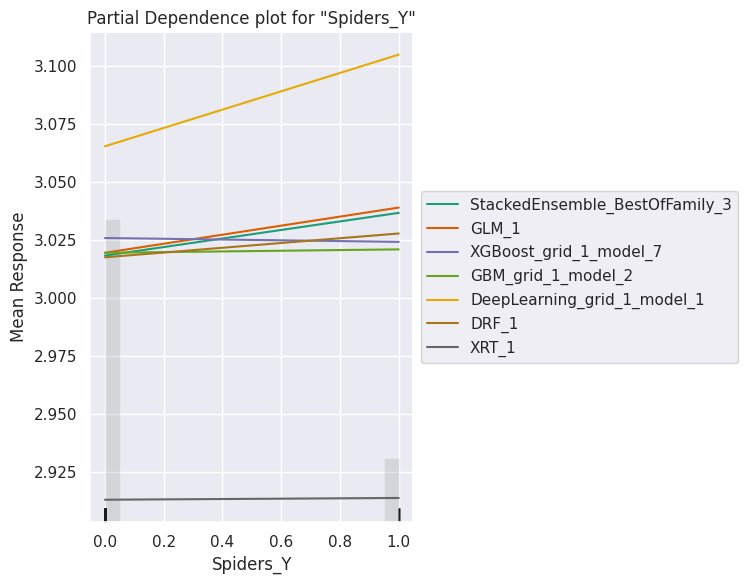

In [ ]:
explain_model = aml.explain(frame = df1_test, figsize = (8,6),include_explanations=['pdp'])

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  ---------  ---------  ------------------------  ------------------  -------------------------  ---------------
GLM_1_AutoML_1_20240402_234150                           0.101866  0.0103768  0.0411237  0.0232301                 0.0103768                  63                   0.006918  GLM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_234150  0.102082  0.0104206  0.0413347  0.0233316                 0.0104206                 248                   0.040273  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240402_234150     0.102474  0.010501   0.0406963  0.0232852                 0.010501                  243                   0.110142  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_234150  0.102483  0.0105028  0.0407189  0.0232848                 0.0105028                 399                   0.100916  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_234150  0.103559  0.0107245  0.0412465  0.0235722                 0.0107245                 115                   0.09923   StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_234150  0.104425  0.0109047  0.0430608  0.0239064                 0.0109047                 222                   0.105228  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20240402_234150     0.104447  0.0109092  0.0428004  0.0238906                 0.0109092                 148                   0.131494  StackedEnsemble
XGBoost_grid_1_AutoML_1_20240402_234150_model_20         0.105056  0.0110368  0.0251707  0.0232434                 0.0110368                 462                   0.012539  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_8          0.107528  0.0115623  0.0221053  0.023646                  0.0115623                 324                   0.008859  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_23         0.111517  0.0124359  0.0383966  0.0248932                 0.0124359                 404                   0.009864  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_2          0.117105  0.0137135  0.0416518  0.0261992                 0.0137135                 384                   0.016205  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_1          0.119349  0.0142442  0.0520952  0.029881                  0.0142442                 754                   0.009325  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_7          0.119432  0.0142639  0.0509057  0.0276481                 0.0142639                 395                   0.016129  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_13         0.121365  0.0147295  0.0440345  0.0266143                 0.0147295                 349                   0.009776  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_4          0.123317  0.0152071  0.0479434  0.0272623                 0.0152071                 494                   0.015021  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_11         0.1259    0.0158508  0.0633805  0.0326602                 0.0158508                 550                   0.010804  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_16         0.127773  0.0163259  0.0644412  0.0308082                 0.0163259                1531                   0.010894  XGBoost
XGBoost_2_AutoML_1_20240402_234150                       0.128254  0.0164491  0.059153   0.0288178                 0.0164491                2507                   0.015515  XGBoost
XGBoost_grid_1_AutoML_1_20240402_234150_model_3          0.129269  0.0167105  0.048682   0.0281436                 0.0167105                 341                   0.012975  XGBoost
GBM_grid_1_AutoML_1_20240402_234150_model_2              0.132475  0.0175497  0.0586403  0.0326436                 0.0175497                 184      

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

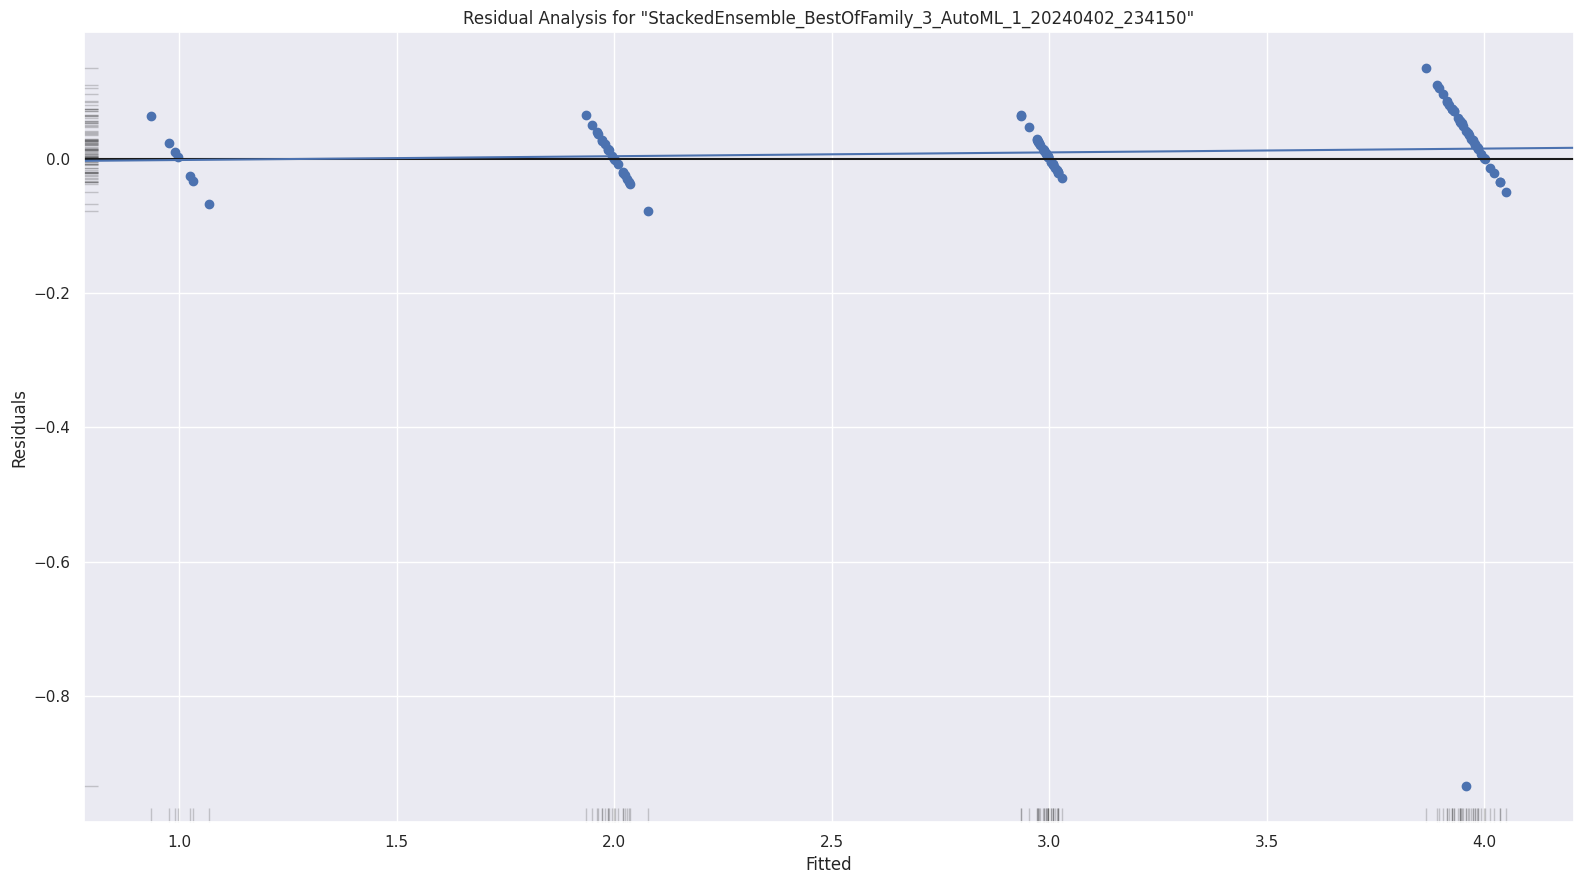

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

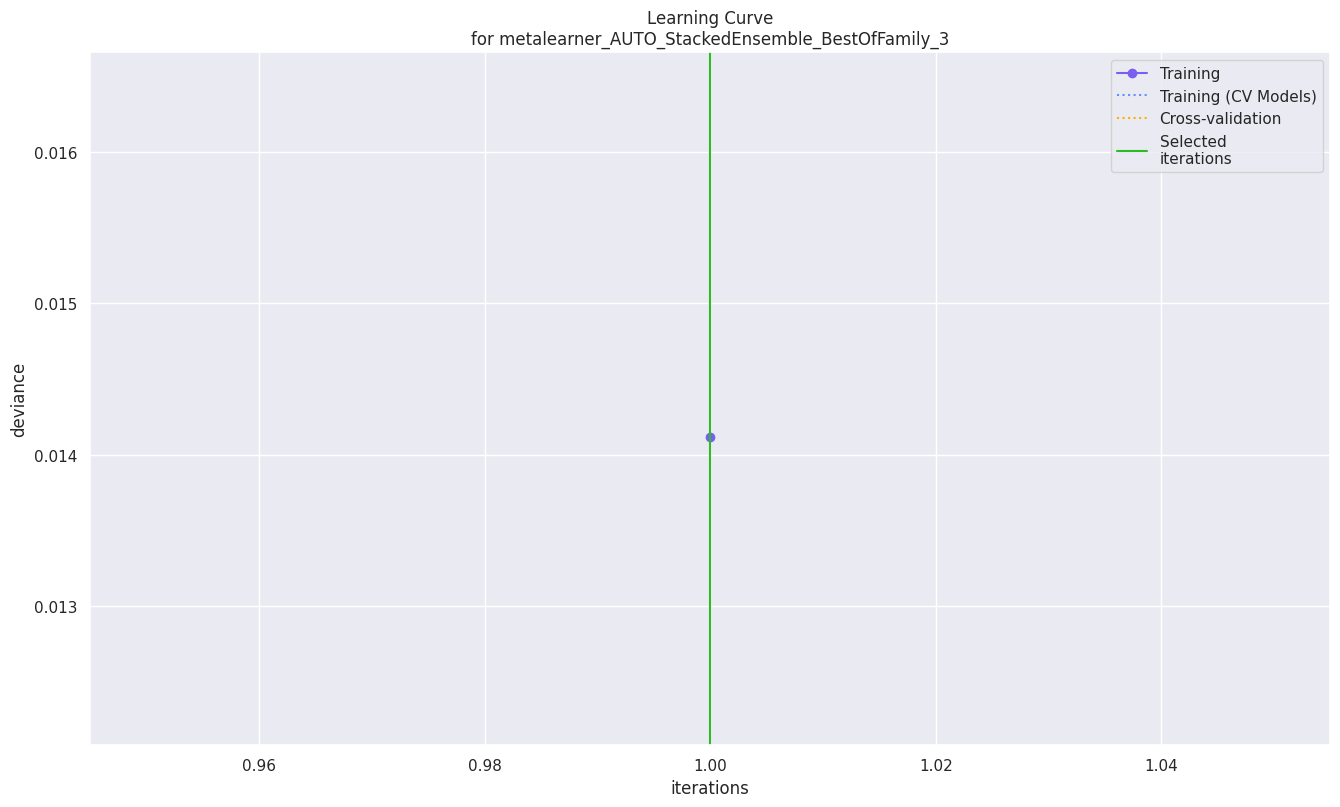

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

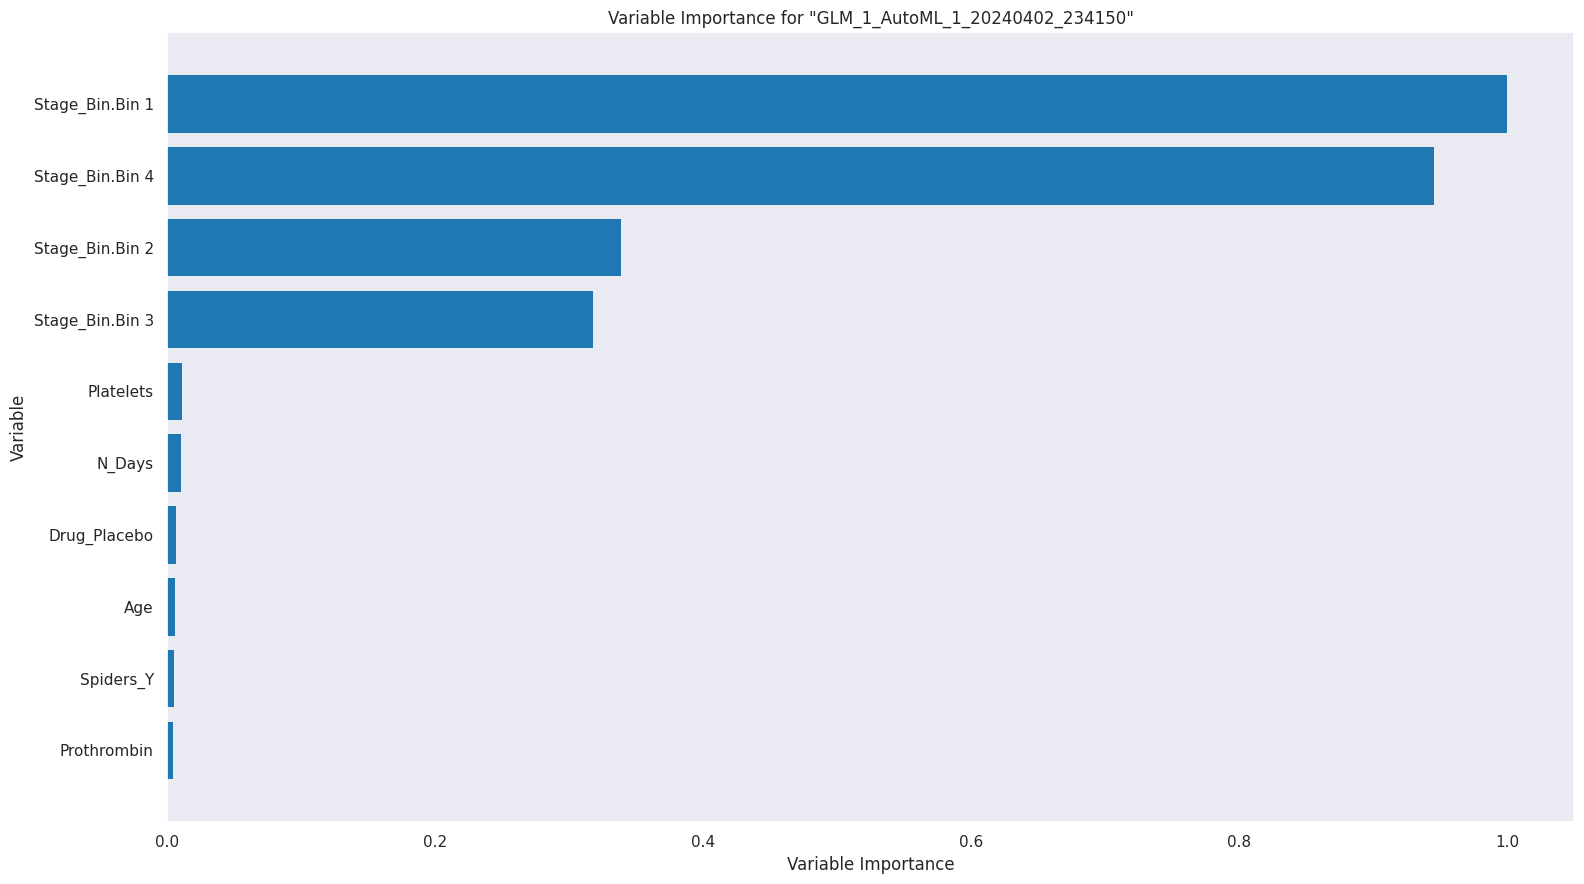

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

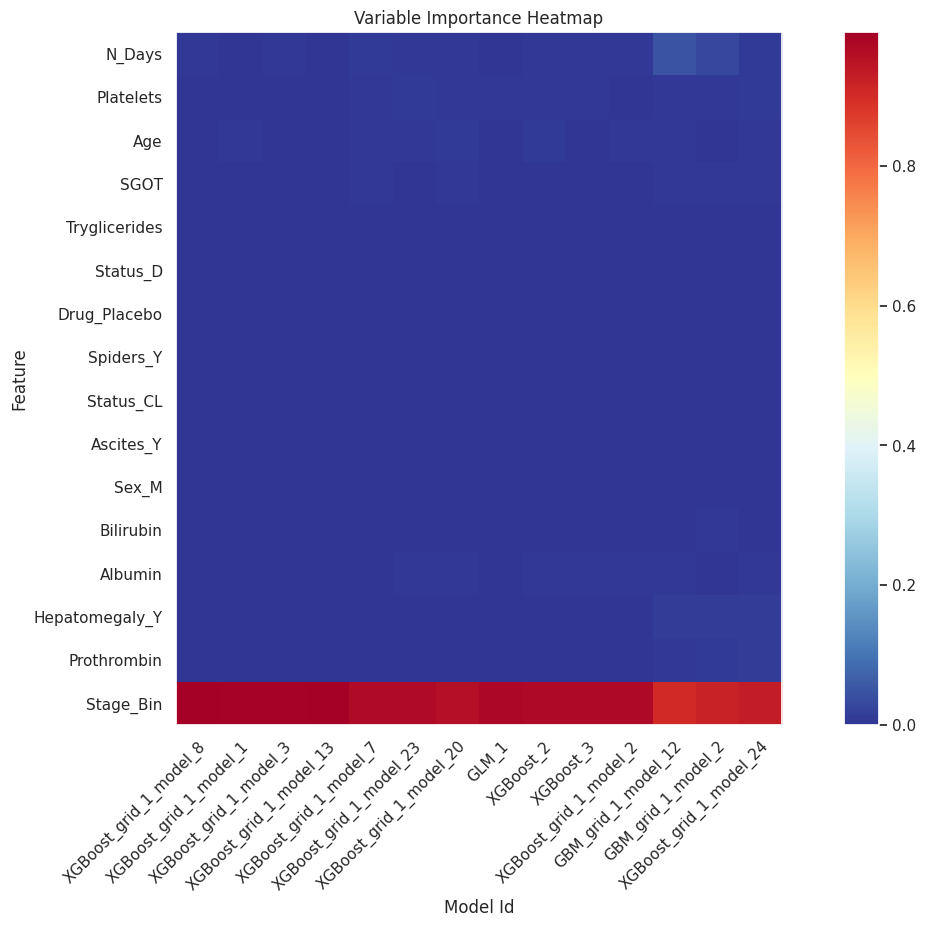

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

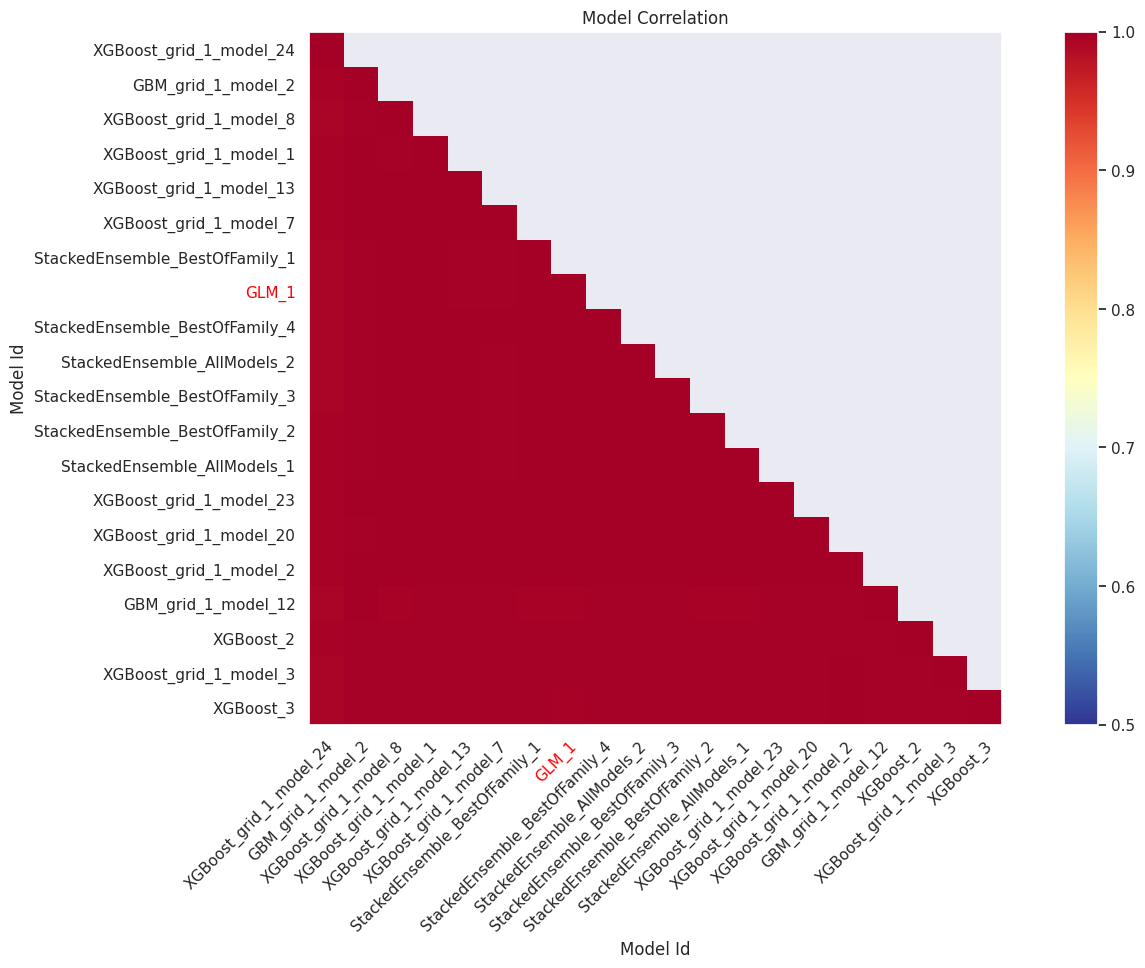

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

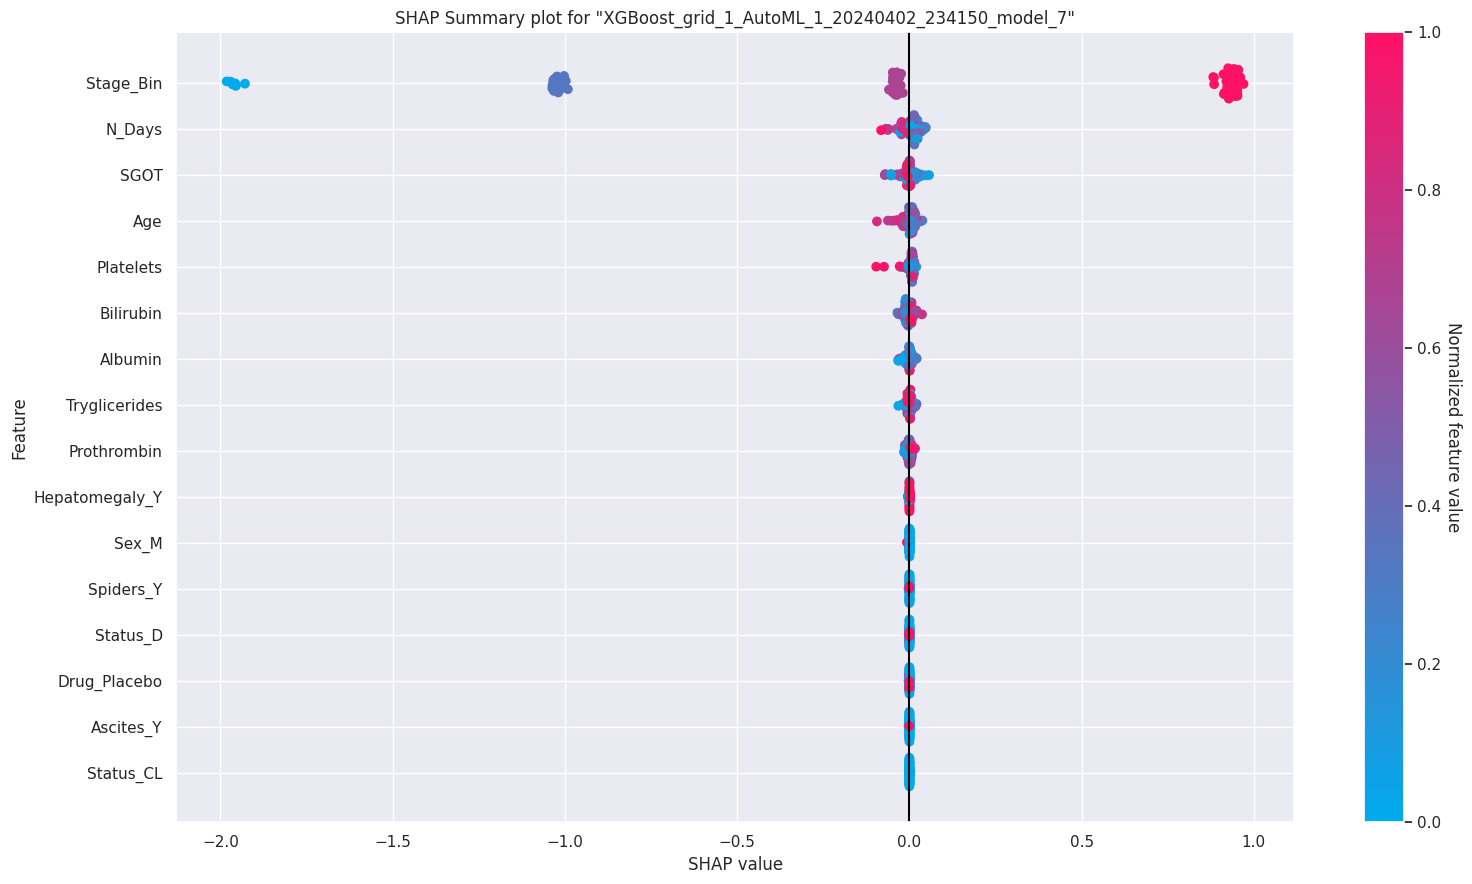

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

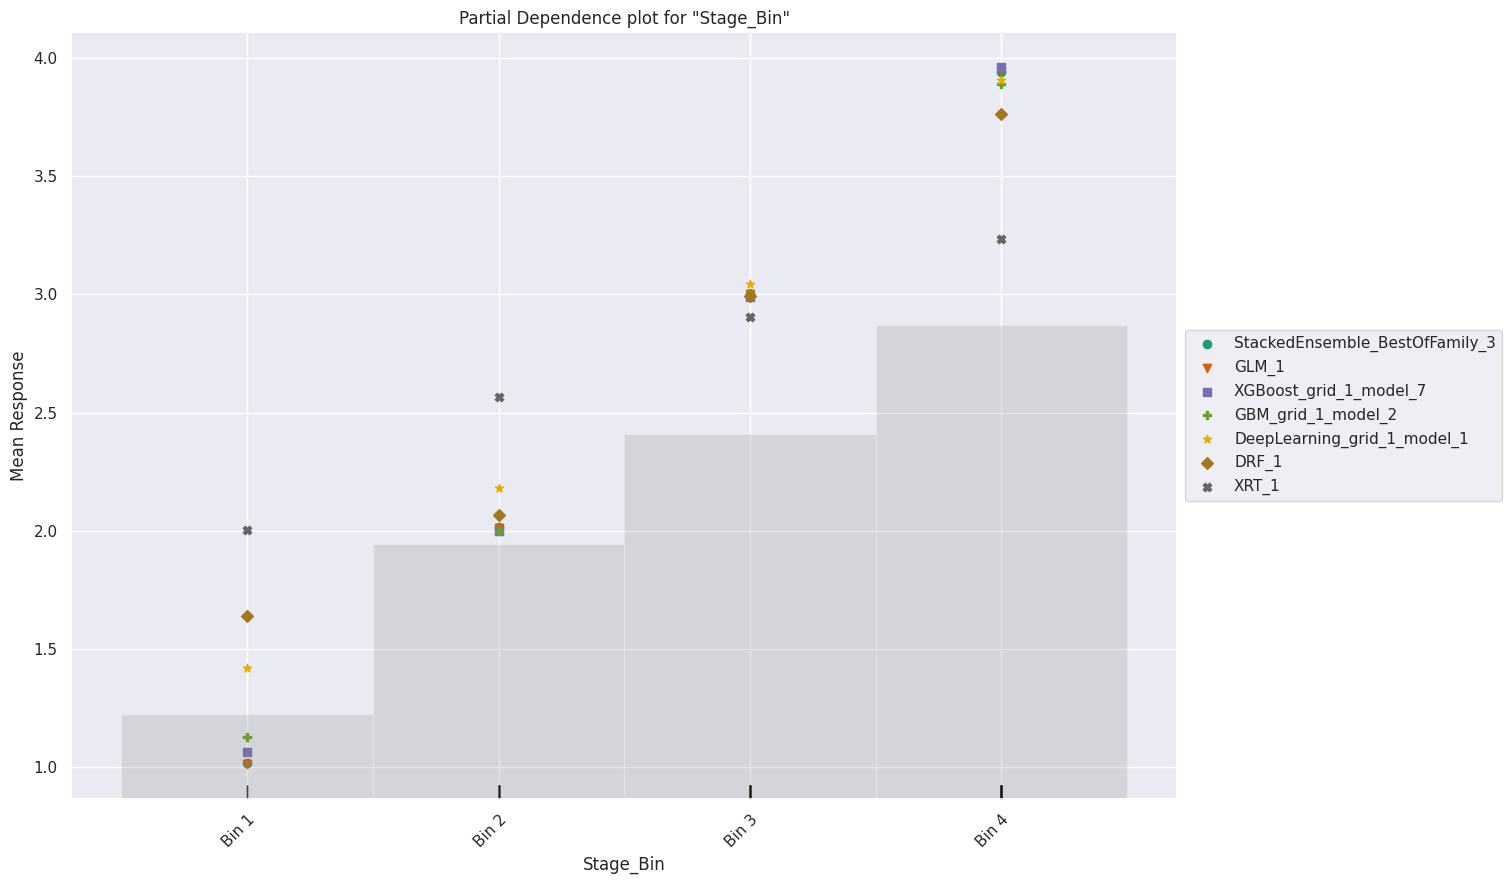

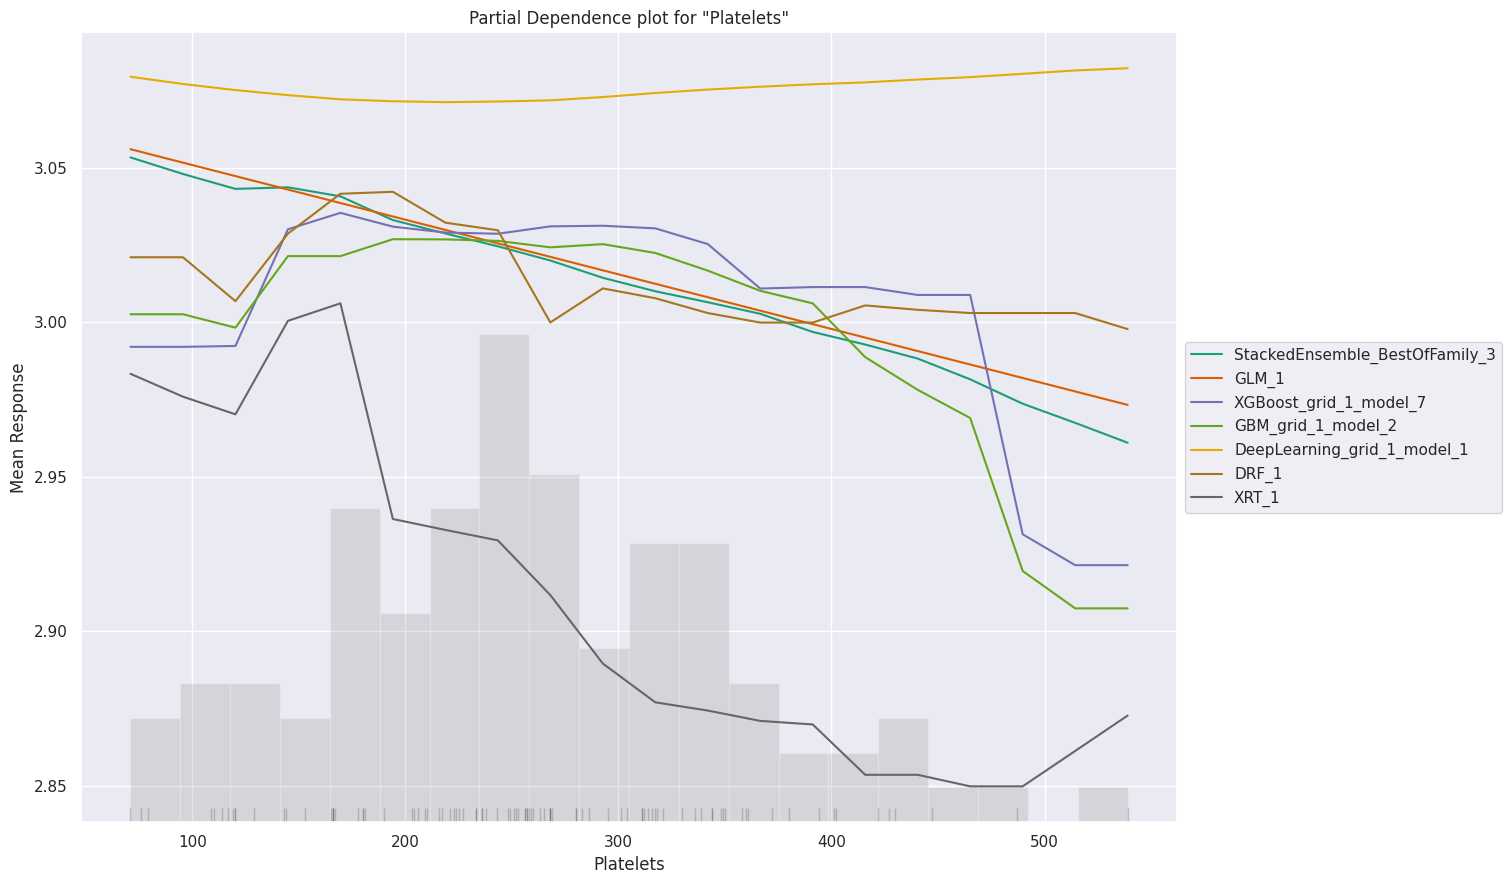

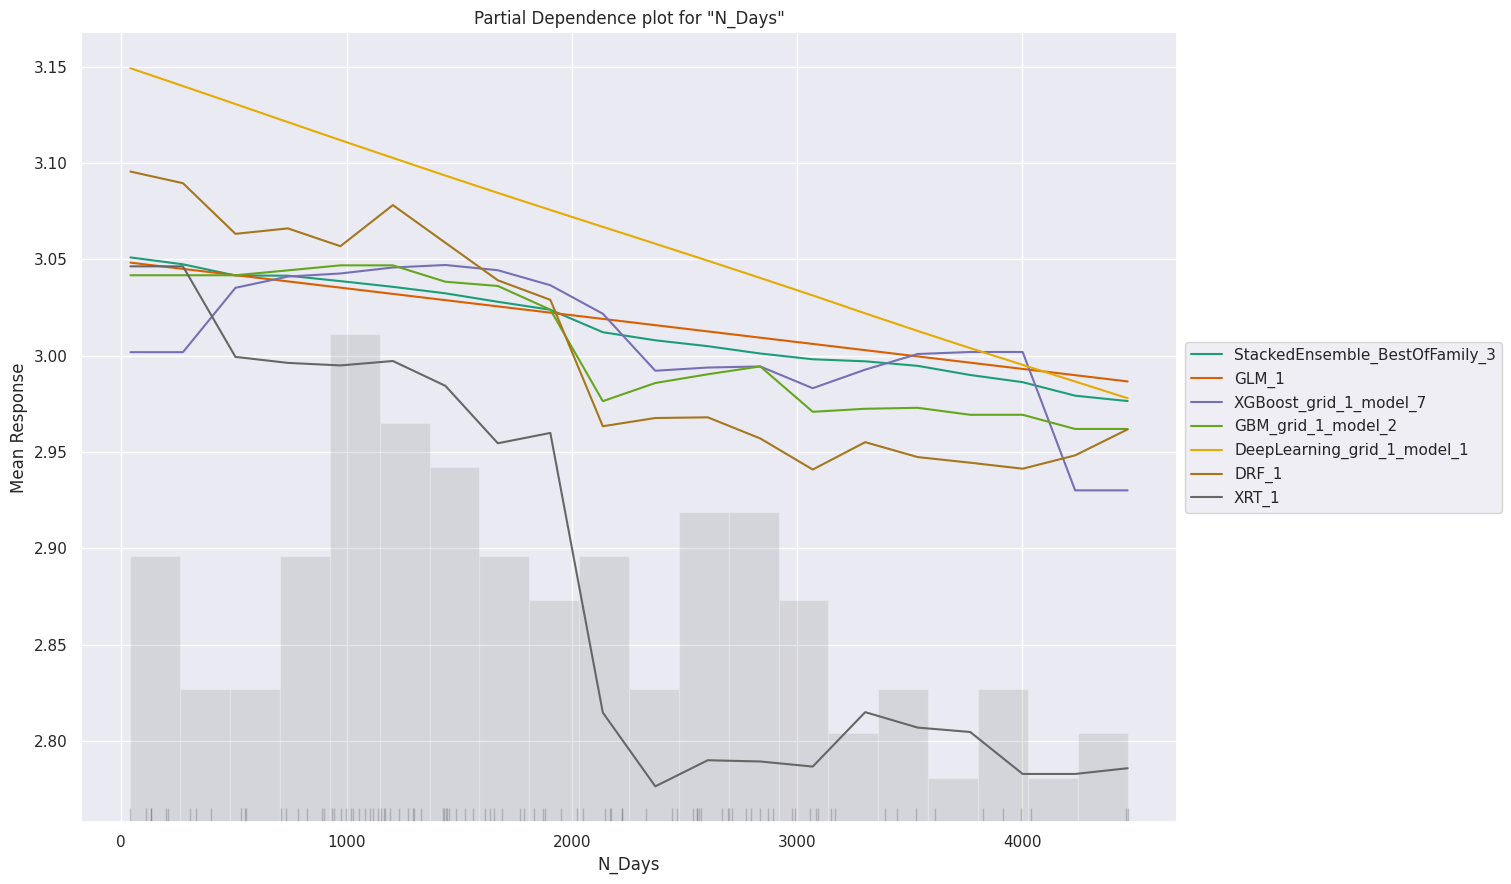

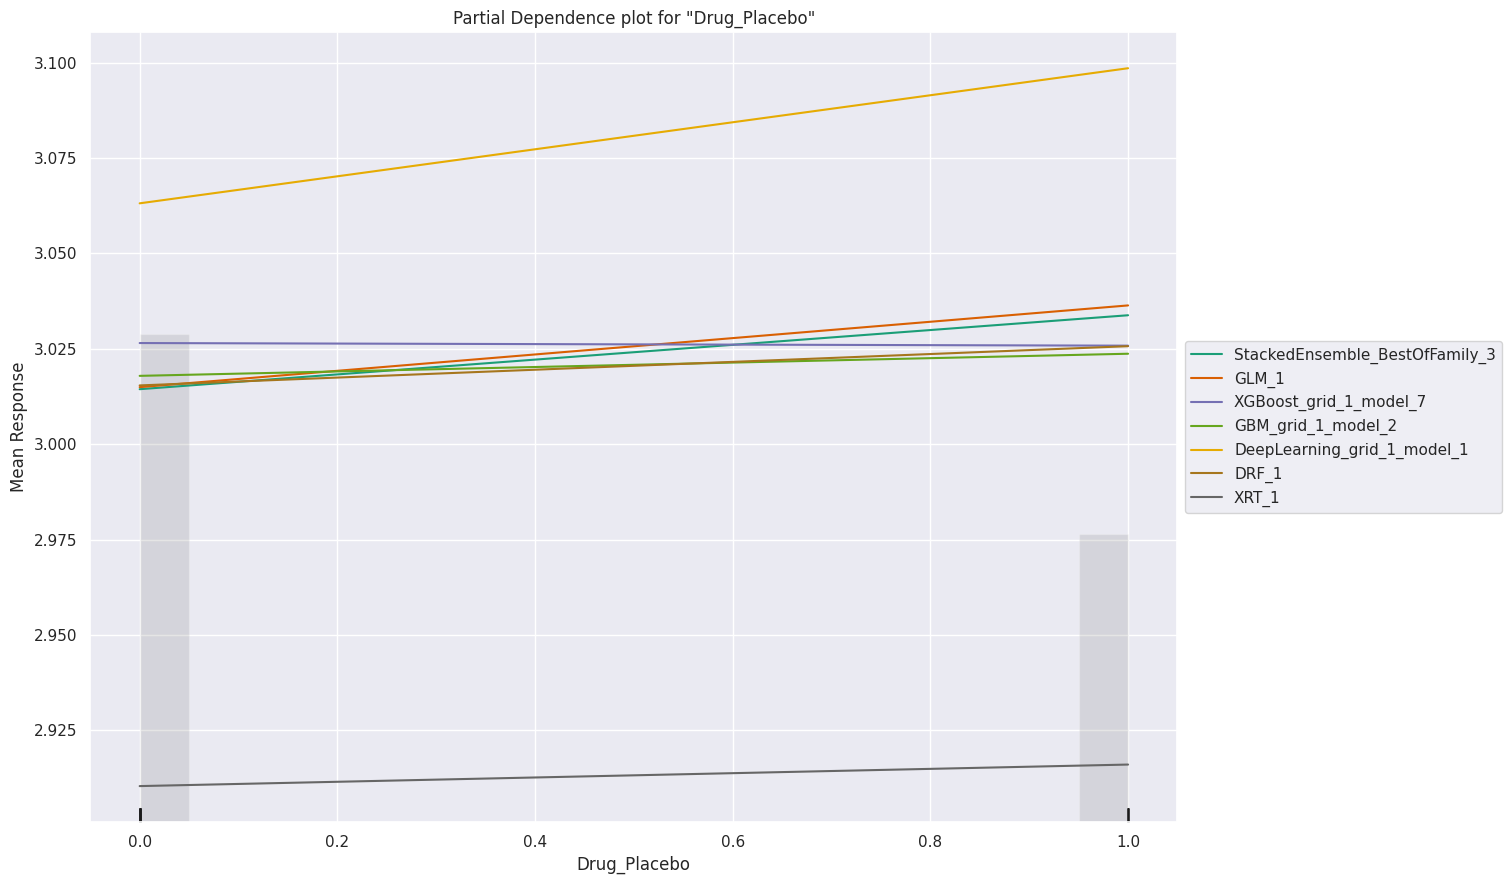

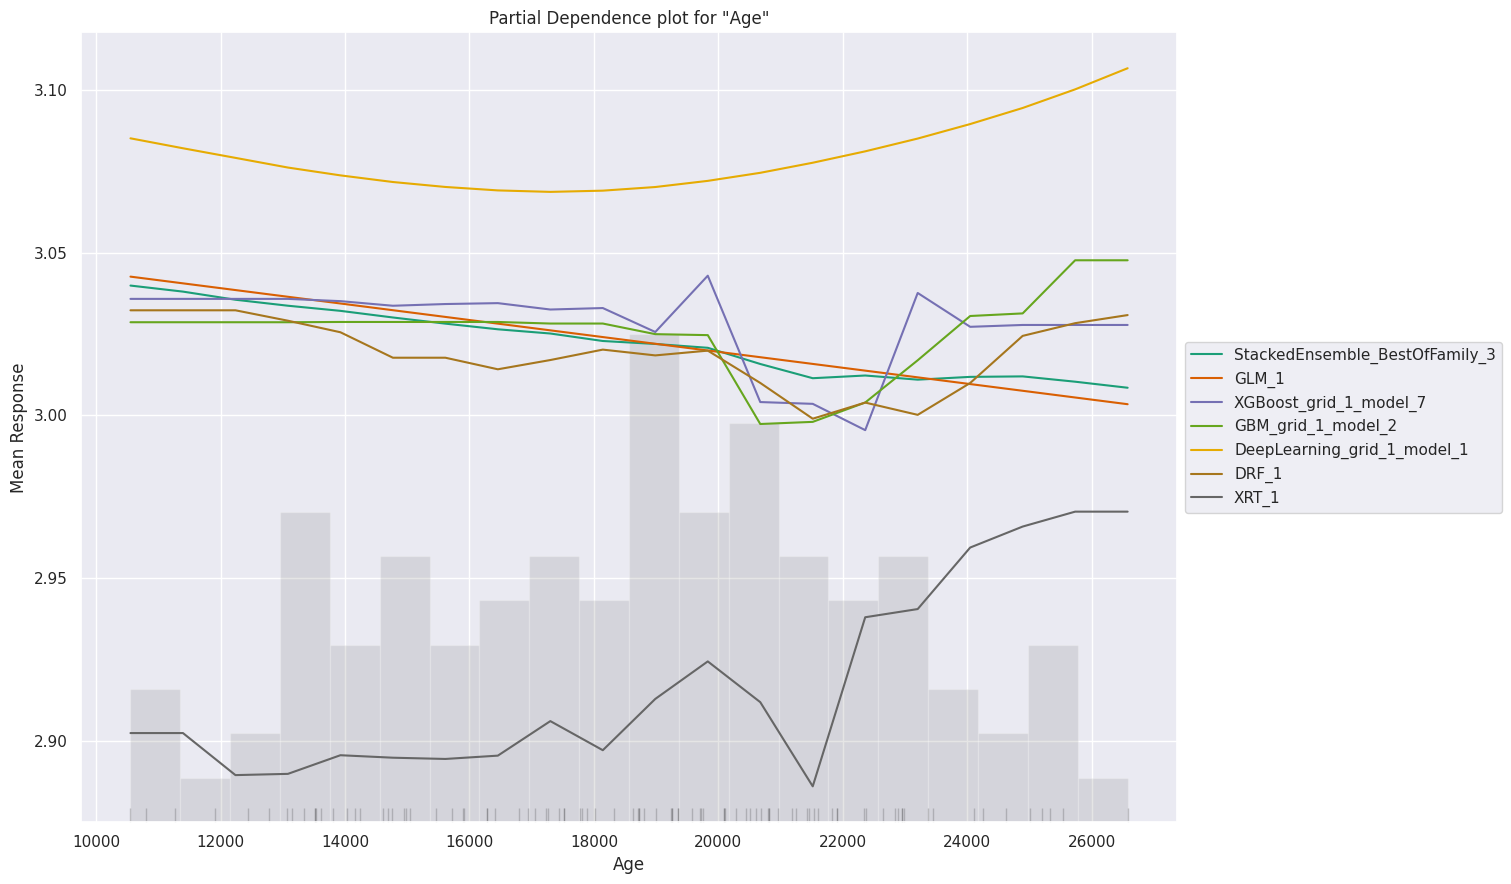

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

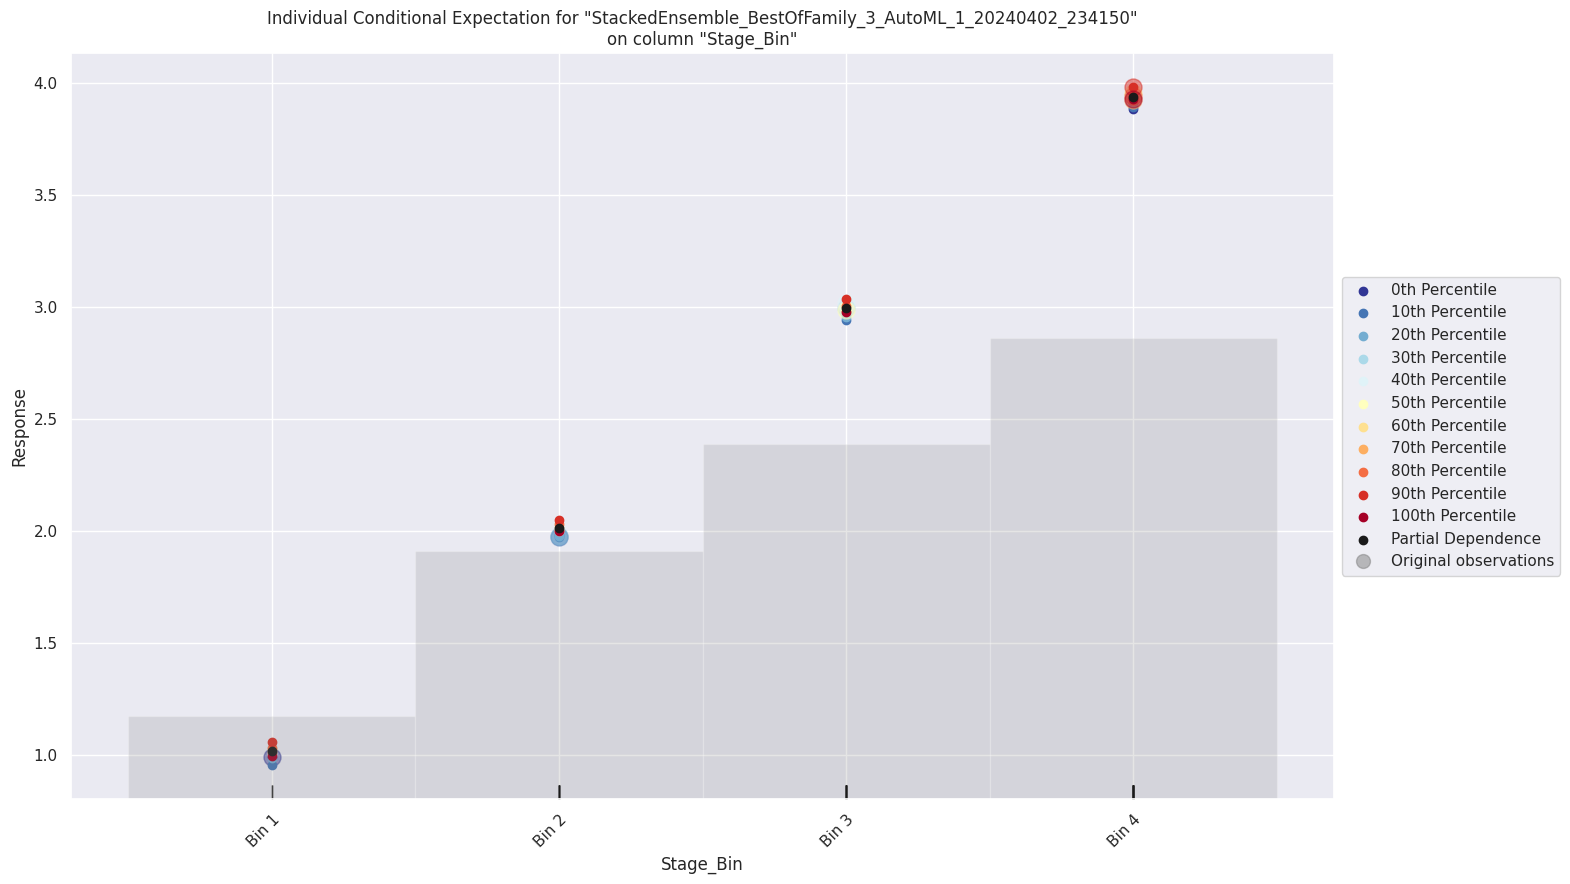

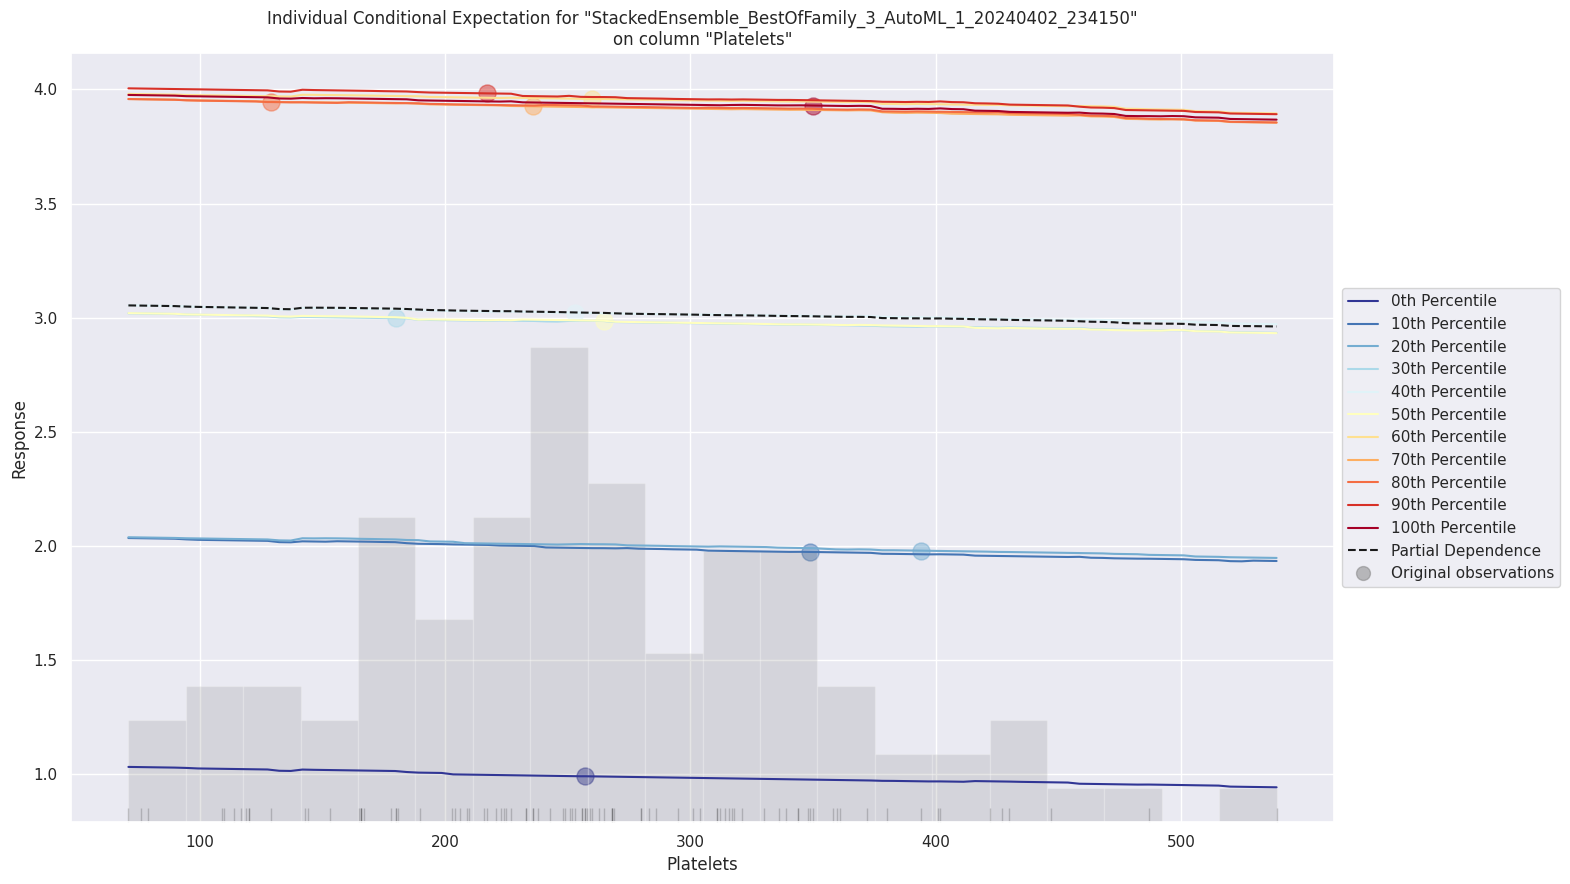

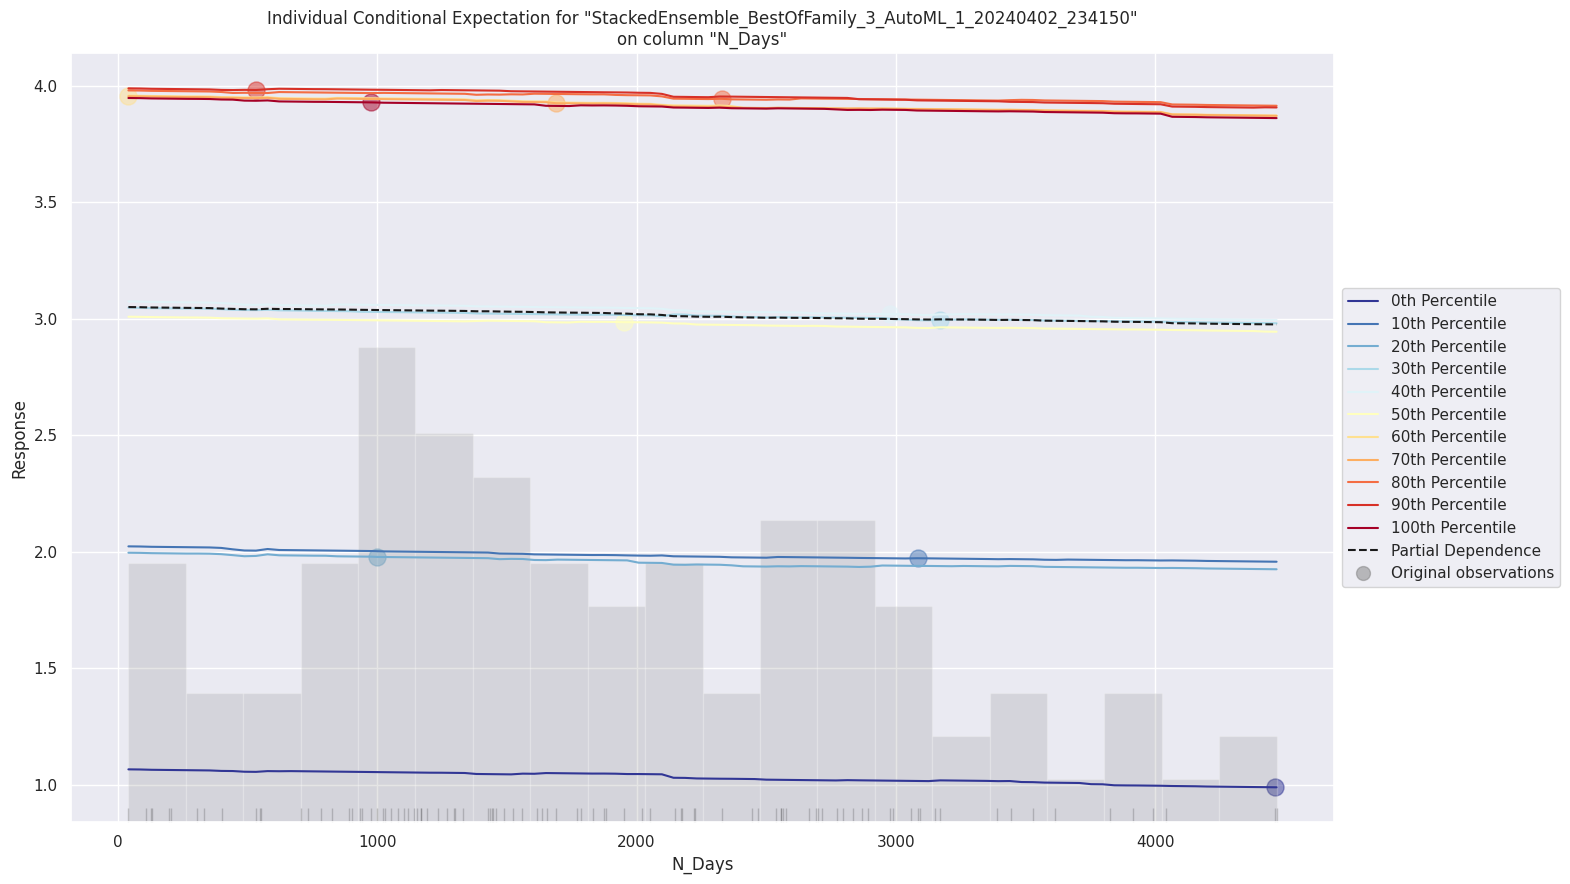

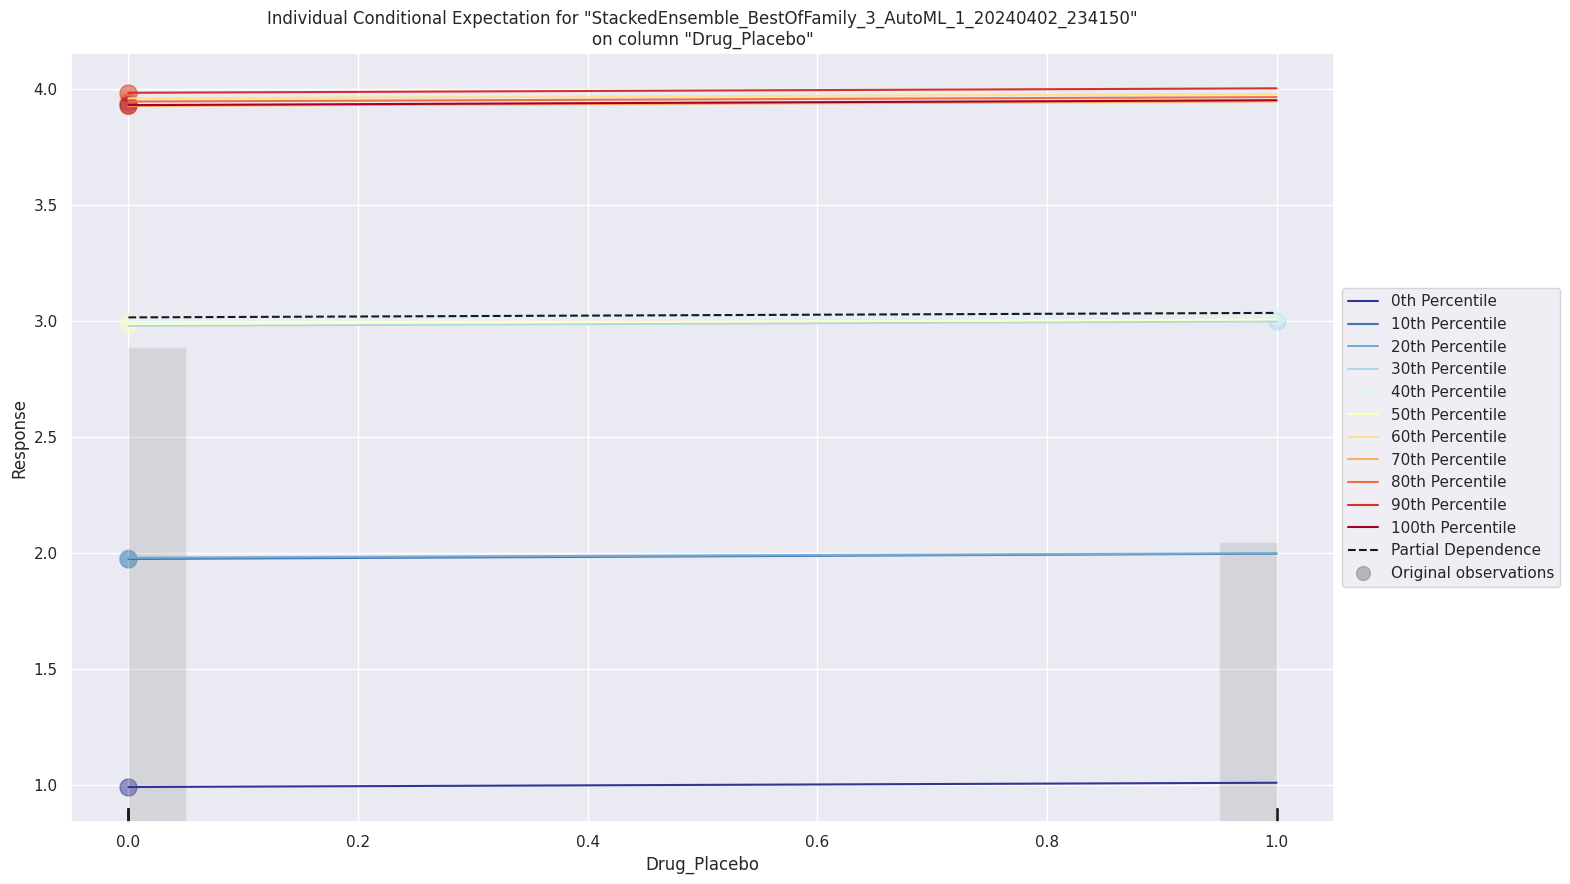

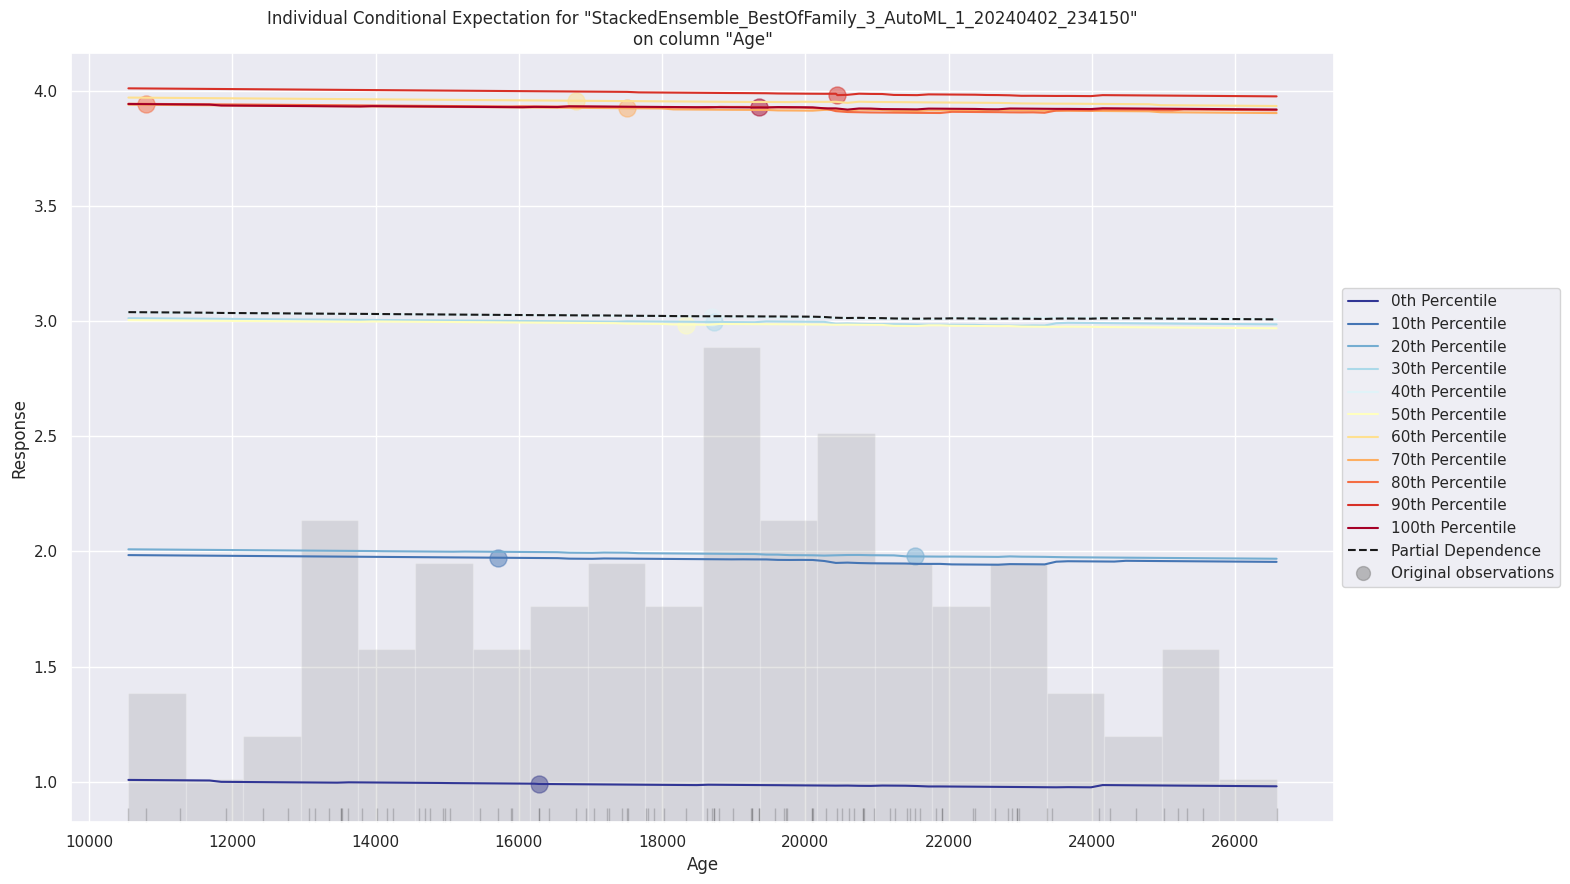

In [ ]:
exa = aml.explain(df1_test)

The analysis of the best model from AutoML reveals insightful interpretations through residual analysis, SHAP summary, and Partial Dependence Plots (PDPs).

Residual Analysis:

The distinct horizontal lines or "stripes" in the residuals suggest the response variable's discrete nature or rounding to integer values, commonly seen in count or category predictions.
The symmetric distribution of residuals indicates minimal systematic overprediction or underprediction.
The consistent spread of residuals across fitted values implies constant variance (homoscedasticity) in the model, a desirable property.
No individual points deviate significantly from others, indicating the model's robustness against outliers.
Despite the absence of funnel-like widening or narrowing patterns, discrete horizontal lines hint at potential model improvement, perhaps through different modeling approaches or transformations.
SHAP Summary:

Features like 'Hepatomegaly_Y', 'N_Days', and 'Age' hold significant importance, with 'Hepatomegaly_Y' being the most influential.
SHAP values provide insights into how each feature impacts predictions, with positive values indicating an increase and negative values indicating a decrease.
Feature values are represented by colors, where high values are in red and low values in blue, helping understand their impact on predictions.
The spread of dots along the SHAP value axis shows the variety of impacts different feature values have on predictions, with consistent positive impacts seen for 'Hepatomegaly_Y'.
Comparative analysis of SHAP values across features reveals varying impacts, aiding in understanding feature importance.
Partial Dependence Plot (PDP):

'Hepatomegaly_Y' positively influences the response variable, while 'N_Days' exhibits a negative relationship.
'Age' shows a complex, non-linear association, with varying impacts across different age ranges.
'Albumin' and 'Bilirubin' display non-linear relationships, suggesting optimal ranges for maximizing the response.
'Platelets' exhibit an inverse relationship, indicating higher counts may lead to lower predictions.
'Sex_M' and 'Ascites_Y' have noticeable effects on predictions, with 'M' category and presence of ascites showing downward and upward trends, respectively.
'Spiders_Y' positively correlates with predictions.
These interpretations highlight key predictors and their impacts on predictions, providing valuable insights into the model's behavior and informing potential actions for improving its performance.




# **Hyper Parameter Tuning:-**

In [ ]:
import h20
pandas_df = h2o.as_list(df1)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:
# Assuming 'train' is the H2OFrame containing your training data
predictor_columns = train.columns  # Get all column names from the H2OFrame
y = 'Stage'  # 'y' is the name of your target variable
predictor_columns.remove(y)  # Remove the target variable from the predictors list

# Now train your GBM model using the list of predictor column names
gbm_grid2.train(
    x=predictor_columns,
    y=y,
    training_frame=train,
    validation_frame=validate,
    ntrees=100,
    seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.011898747598076869
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.012239370991256479
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.013113662609195312
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.013864113970684867
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.01617967014884845
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.017612678601341865
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.01766751940697592
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.019270908606414377
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.02009005105601323
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.02052600891163565
---  ---                  ---           ---          ---                 ---                 ---
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.14081315492808558
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.1582997286234255
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.1826896442460566
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.18738715901083608
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.20149640194262916
     0.1                  0.07          7.0          0.8                 gbm_grid2_model_9   0.20151233253258521
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.21767422872991066
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.22626170672608764
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.30675855313806105
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.3737793257650972
[36 rows x 7 columns]

In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [ ]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.011898747598076869
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.012239370991256479
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.013113662609195312
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.013864113970684867
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.01617967014884845
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.017612678601341865
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.01766751940697592
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.019270908606414377
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.02009005105601323
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.02052600891163565
---  ---                  ---           ---          ---                 ---                 ---
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.14081315492808558
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.1582997286234255
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.1826896442460566
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.18738715901083608
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.20149640194262916
     0.1                  0.07          7.0          0.8                 gbm_grid2_model_9   0.20151233253258521
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.21767422872991066
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.22626170672608764
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.30675855313806105
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.3737793257650972
[36 rows x 7 columns]

In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [ ]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.9        0.07          4          0.9           0.011899
1               0.9        0.04          4          0.9           0.012239
2               0.9        0.10          4          0.7           0.013114
3               0.9        0.09          8          0.9           0.013864
4               0.9        0.09          9          0.6           0.016180
5               0.7        0.06          5          0.6           0.017613
6               0.8        0.06          9          0.6           0.017668
7               0.9        0.03         10          0.5           0.019271
8               0.7        0.03          6          1.0           0.020090
9               0.7        0.07          2          0.6           0.020526
10              0.6        0.09          3          0.9           0.023283
11              0.8        0.03          9          0.9           0.023806
12              0.8      

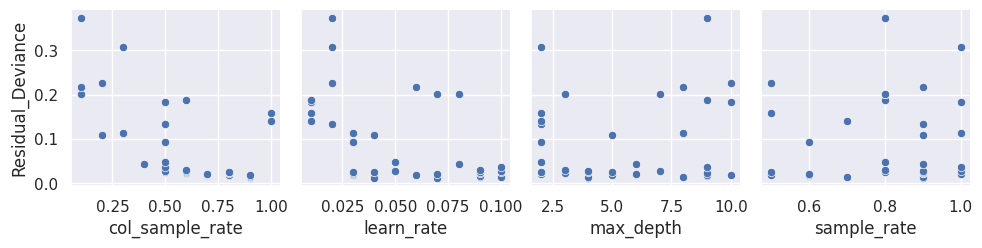

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# **Questions and Answers:-**

1 What is the question?

Ans The primary aim was to identify the key predictors in a medical dataset for diagnosing conditions like cirrhosis disease.

2 What did I do?

Ans I embarked on an in-depth data analysis, starting with the preprocessing of data, including encoding of categorical variables. I applied three feature selection techniques: Recursive Feature Elimination using Logistic Regression, LassoCV, and analysis of feature importance using Random Forest. I developed models using Logistic Regression and Random Forest classifiers to evaluate their effectiveness. Additionally, I utilized SHAP value analysis to gain insights into the impact of individual features on the model's predictions.

3 How well did it work?

Ans The analysis was successful in pinpointing crucial predictors for the target variable. The performance of the models was satisfactory, with the Random Forest classifier showing notable strength in feature importance analysis. While there were initial hurdles with SHAP value computation for the Logistic Regression model, I managed to calculate them for the Random Forest model, providing significant interpretative value.

4 What did I learn?

Ans This project deepened my understanding of machine learning's practical applications, particularly in healthcare. It taught me about the importance of feature selection, model training, and the necessity for interpretable models in the medical domain. Working with diverse data types and employing various feature selection methods refined my analytical abilities. The experience with SHAP values highlighted the need to comprehend machine learning models' decision-making processes, emphasizing that interpretability is as important as accuracy in medical decision-making.

# **Conclusion:-**

In this project, I immersed myself in the intricate task of predicting a critical medical condition, utilizing a dataset rich in diverse features. Through rigorous preprocessing and encoding of the data, I established a sturdy groundwork for analyzing features and training models. Employing three distinct feature selection methods—Recursive Feature Elimination with Logistic Regression, LassoCV, and assessing Random Forest feature importance—I identified pivotal variables that strongly influence the target condition.

I evaluated the Logistic Regression and Random Forest models for their predictive accuracy and generalization capabilities from the training dataset. Notably, the Random Forest model displayed exceptional performance and provided valuable insights through feature importance metrics, which I further explored using SHAP analysis. While initially encountering challenges in calculating SHAP values for the Logistic Regression model, I gleaned insightful interpretations from the Random Forest model's interpretability analysis.

This project shed light on the intricate relationship between feature selection, model selection, and interpretability in machine learning, particularly within the critical domain of healthcare. It underscored the significance of not only achieving high predictive accuracy but also ensuring that models yield actionable insights through interpretable outcomes. These insights are crucial for healthcare practitioners to trust and effectively utilize the model's predictions.

In essence, this project served as a profound educational journey, reinforcing the necessity of a systematic and insightful approach to data science challenges, especially in fields where decisions profoundly impact human well-being.





# **References**

H20.ai- https://docs.h2o.ai/

Logistic Regression- https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on.

Random Forest- https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Github Link- https://github.com/Vinay1289Sai/DSMT1_Vinay

Dataset- https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

ChatGPT-https://chat.openai.com/

Github(Reference given by professor) - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

MIT License

Copyright (c) 2024 Vinay1289Sai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.